In [1]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy.stats import kurtosis
from tabulate import tabulate
import matplotlib as mat

In [2]:
df = pd.read_excel('DS1_C5_S4_Credit_Data_Hackathon.xlsx')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# TASK- 1 PRE-PROCESSING DATA

In [3]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [4]:
df.shape

(100000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [3]:
def seperate_data_types(df):
    categorical = []
    continous = []
    for column in df.columns:
        if df[column].dtypes == object:
            categorical.append(column)
        else:
            continous.append(column)
    return categorical,continous
categorical,continous = seperate_data_types(df)


from tabulate import tabulate
table = [categorical,continous]
print(tabulate({'Categorical': categorical,'Continous':continous}, headers =['categorical','continous']))

categorical          continous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


In [4]:
def info_of_cat(col):
    print(f'Unique values in {col} are : {df[col].unique()}')
    print(f'mode of  {col} is : {df[col].mode()[0]}')
    print(f'total count of missing values in {col} is : {df[col].isnull().sum()}')

In [5]:
def info_of_numerical(col):
    print(f'the mean of the {col} are : {df[col].mean()}')
    print(f'the median of the {col} are : {df[col].median()}')
    print(f'mode of  {col} is : {df[col].mode()[0]}')
    print(f' standard deviation of  {col} is : {df[col].std()}')
    print(f'total count of missing values in {col} is : {df[col].isnull().sum()}')

In [6]:
info_of_numerical('AMT_GOODS_PRICE')

the mean of the AMT_GOODS_PRICE are : 538345.1489706662
the median of the AMT_GOODS_PRICE are : 450000.0
mode of  AMT_GOODS_PRICE is : 450000.0
 standard deviation of  AMT_GOODS_PRICE is : 369397.7246421765
total count of missing values in AMT_GOODS_PRICE is : 81


In [10]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(), inplace = True)

In [11]:
info_of_numerical('AMT_GOODS_PRICE')

the mean of the AMT_GOODS_PRICE are : 538345.1489706668
the median of the AMT_GOODS_PRICE are : 450000.0
mode of  AMT_GOODS_PRICE is : 450000.0
 standard deviation of  AMT_GOODS_PRICE is : 369248.08675950737
total count of missing values in AMT_GOODS_PRICE is : 0


In [12]:
info_of_cat('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE are : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
mode of  NAME_TYPE_SUITE is : Unaccompanied
total count of missing values in NAME_TYPE_SUITE is : 405


In [13]:
df['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

In [14]:
info_of_cat('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE are : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
mode of  NAME_TYPE_SUITE is : Unaccompanied
total count of missing values in NAME_TYPE_SUITE is : 0


In [15]:
info_of_numerical('CNT_FAM_MEMBERS')

the mean of the CNT_FAM_MEMBERS are : 2.1556715567155673
the median of the CNT_FAM_MEMBERS are : 2.0
mode of  CNT_FAM_MEMBERS is : 2.0
 standard deviation of  CNT_FAM_MEMBERS is : 0.9088966556371371
total count of missing values in CNT_FAM_MEMBERS is : 1


In [16]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean(), inplace = True)

In [17]:
info_of_numerical('CNT_FAM_MEMBERS')

the mean of the CNT_FAM_MEMBERS are : 2.1556715567155673
the median of the CNT_FAM_MEMBERS are : 2.0
mode of  CNT_FAM_MEMBERS is : 2.0
 standard deviation of  CNT_FAM_MEMBERS is : 0.908892111097052
total count of missing values in CNT_FAM_MEMBERS is : 0


In [18]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
mode of  OCCUPATION_TYPE is : Laborers
total count of missing values in OCCUPATION_TYPE is : 31224


In [19]:
df['OCCUPATION_TYPE'].fillna('Laborers', inplace = True)

In [20]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are : ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
mode of  OCCUPATION_TYPE is : Laborers
total count of missing values in OCCUPATION_TYPE is : 0


In [21]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

# TASK 2                                                                                                                     Perform UNIVARIATE ANALYSIS and Interprete it.

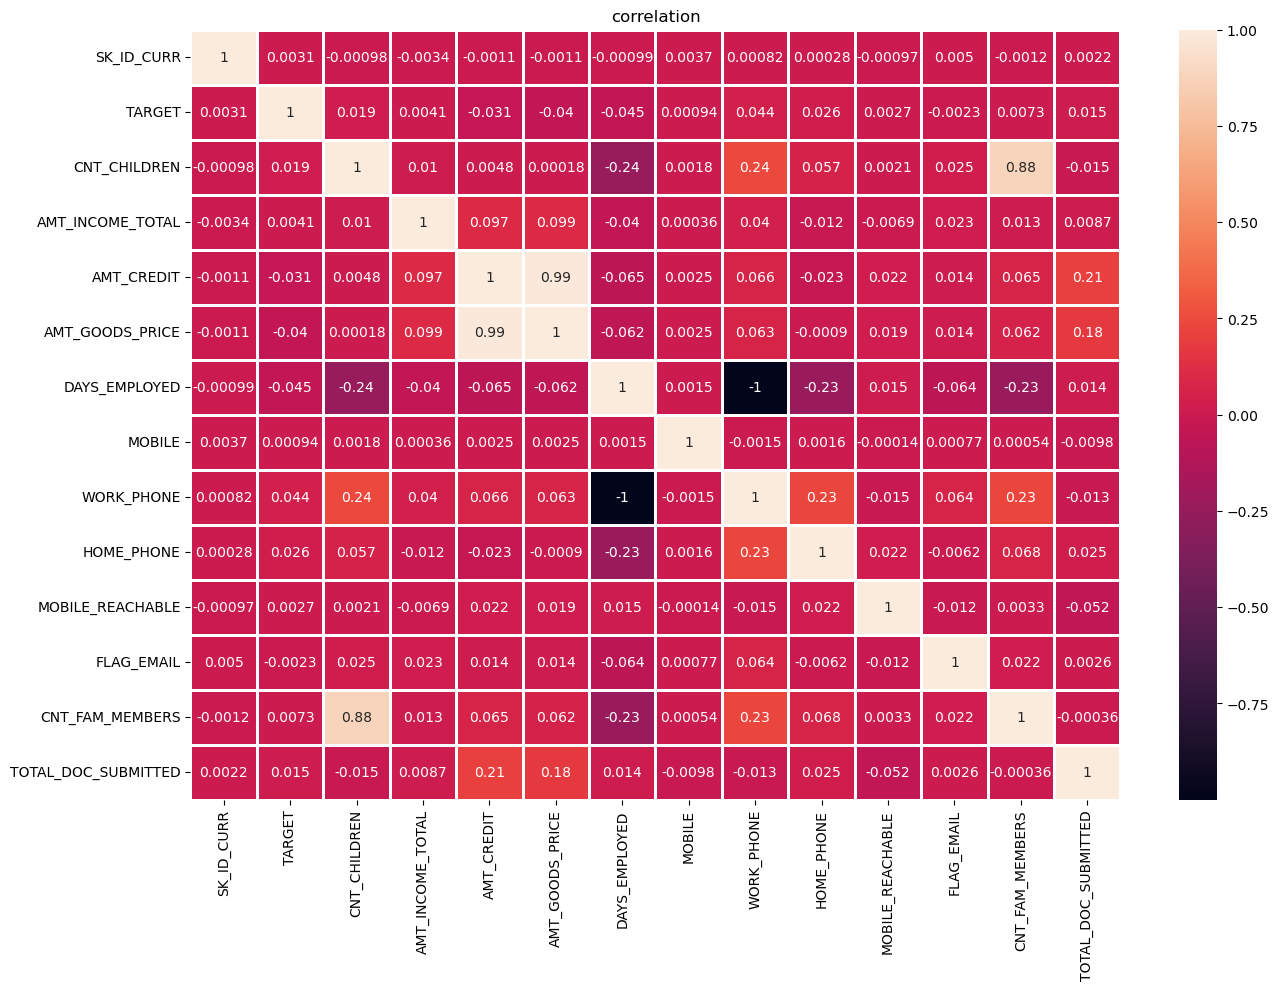

In [22]:
fig,ax = plt.subplots(figsize = (15,10))
ax.set_title('correlation')
corr = df.corr()
sb.heatmap(corr,cbar=True,linewidths=0.9,annot= True)
plt.show()

# INTERPRETATION:- From heatmap, getting correlation between for each numerical columns.Observing that highly correlated columns are                         1) CNT_CHILDREN and CNT_FAM_MEMBERS with 0.88,                                            2) AMT_GOODS_PRICE and AMT_CREDIT with 0.99,                                                  3) WORK_PHONE and DAYS_EMPLOYED with -1 (negatively).

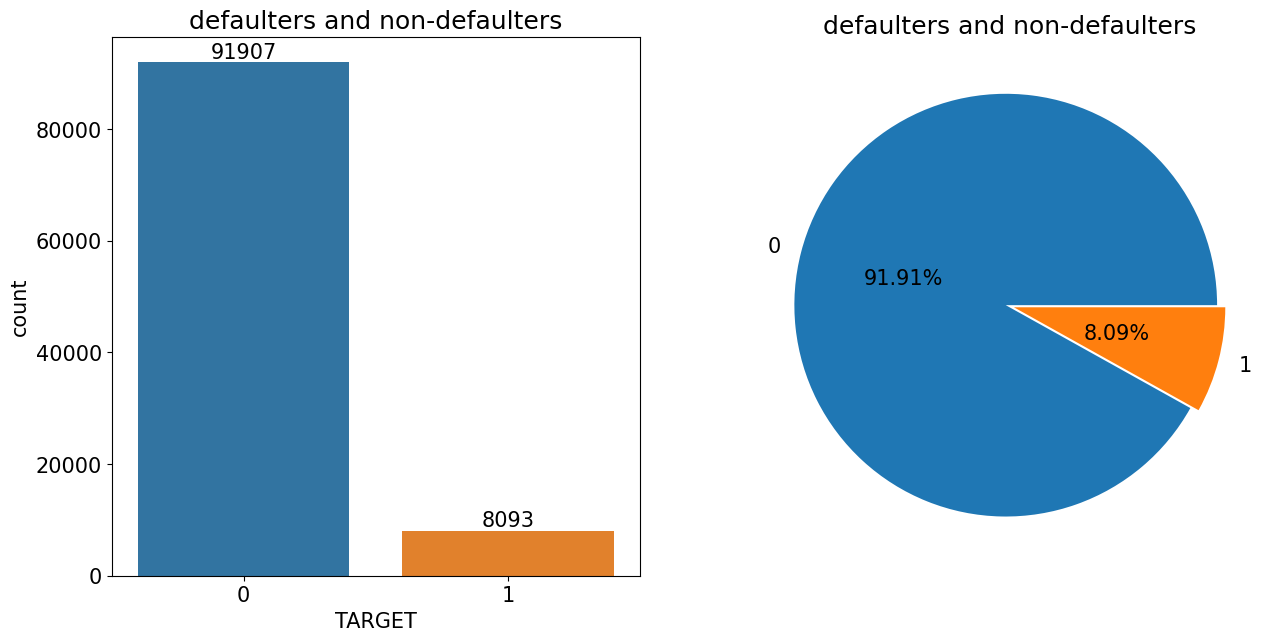

In [84]:
mat.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.countplot(x= df['TARGET'],ax = ax[0])
data = df['TARGET'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
    
ax[0].set_title('defaulters and non-defaulters')
plt.title('defaulters and non-defaulters')
plt.show()

# INTERPRETATION:- From the Graph, 90% are Non-defaulters Remaining 10% are defaulters. That means banks have good position if defaulters are low. I suggested that banks will try to decrease that 10% also, thats better for banks.

# interpretation started from here

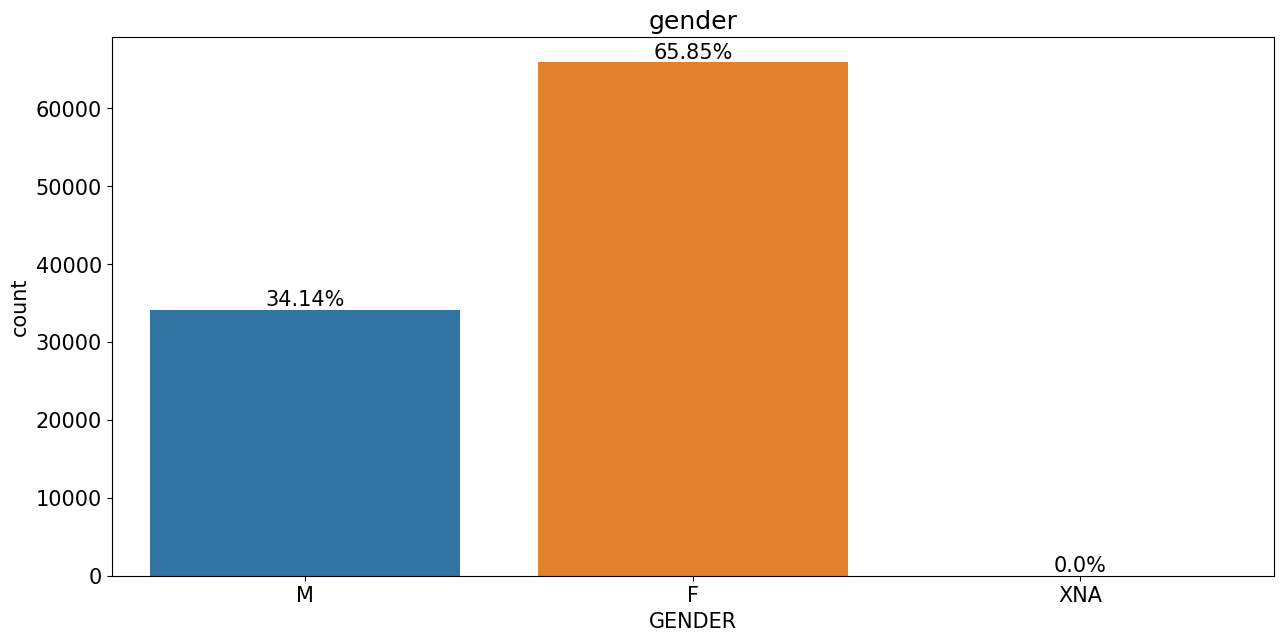

In [83]:
mat.rcParams['font.size'] = 15
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x= df['GENDER'])
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
    

plt.title('gender')
plt.show()

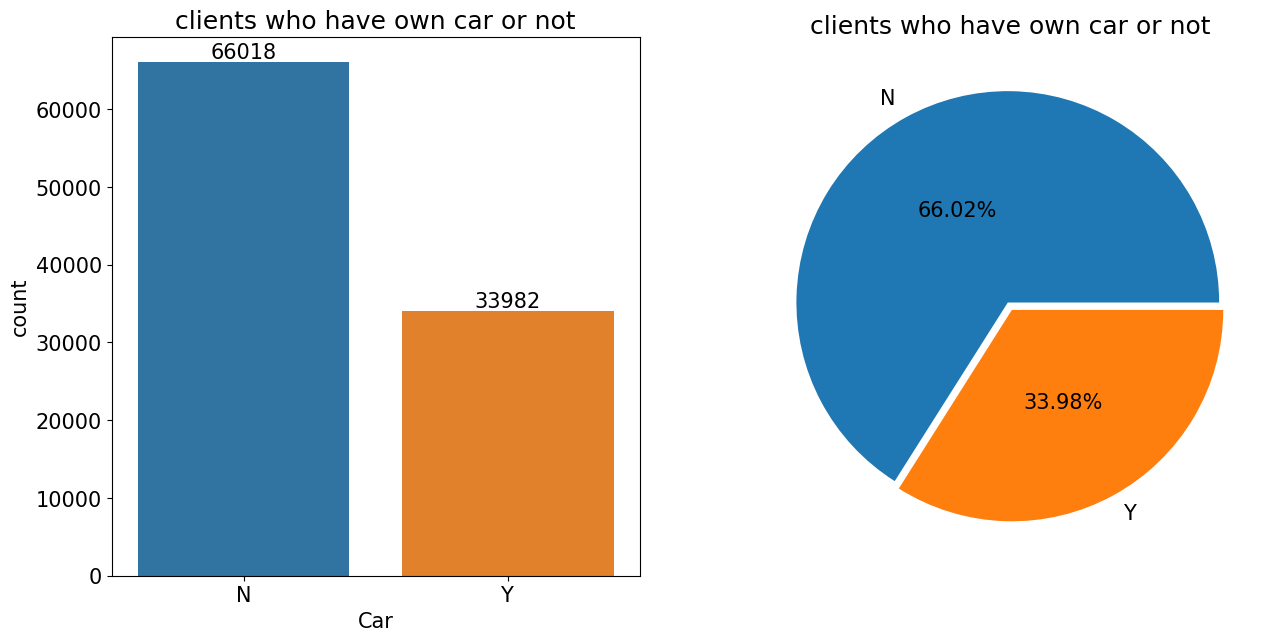

In [82]:
mat.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.countplot(x= df['Car'],ax = ax[0])
data = df['Car'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
    
ax[0].set_title('clients who have own car or not')
plt.title('clients who have own car or not')
plt.show()


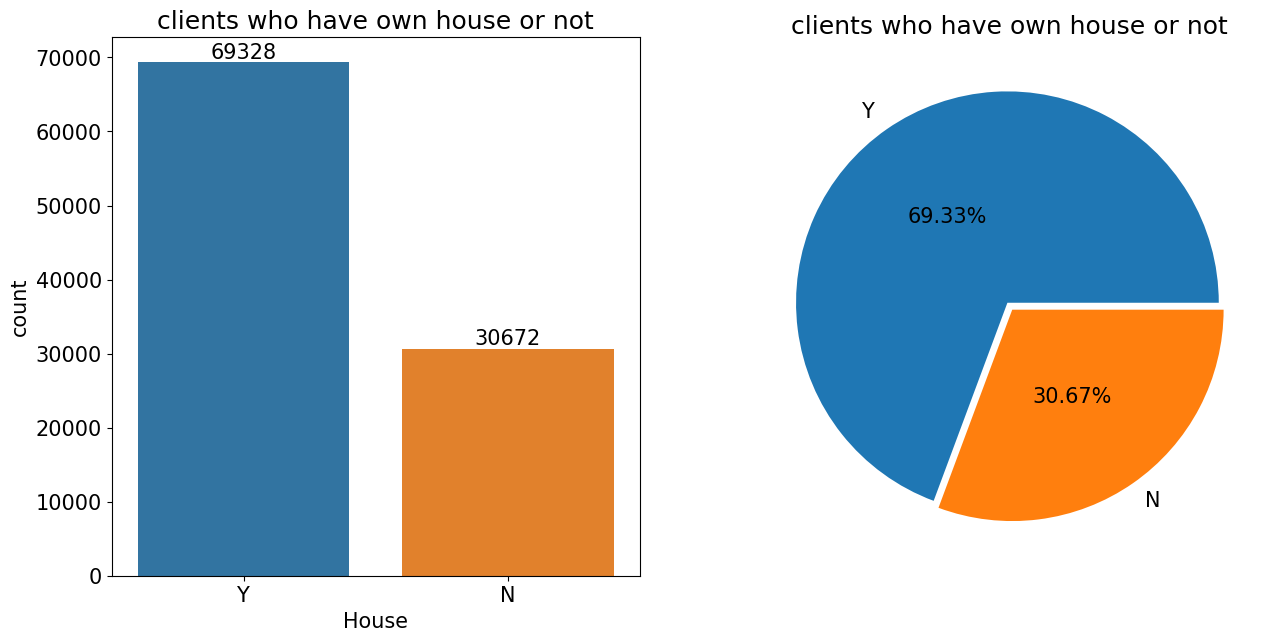

In [81]:
mat.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.countplot(x= df['House'],ax = ax[0])
data = df['House'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
    
ax[0].set_title('clients who have own house or not')
plt.title('clients who have own house or not')
plt.show()

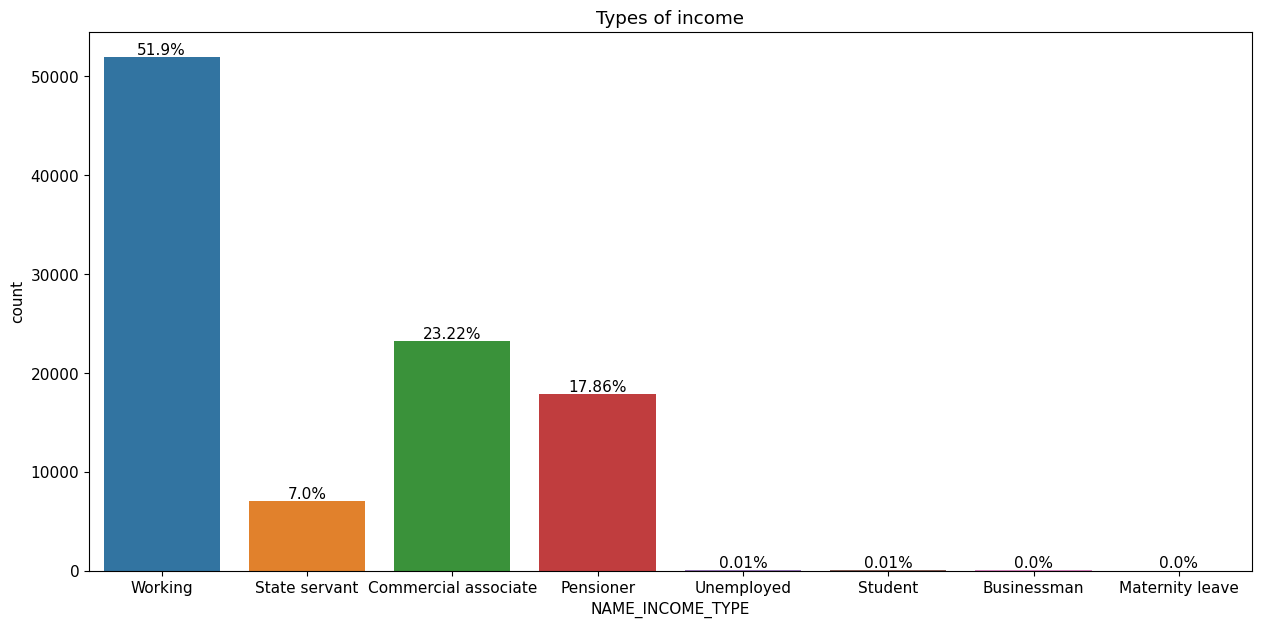

In [80]:
mat.rcParams['font.size'] = 11
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x= df['NAME_INCOME_TYPE'])
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
    

plt.title('Types of income')
plt.show()

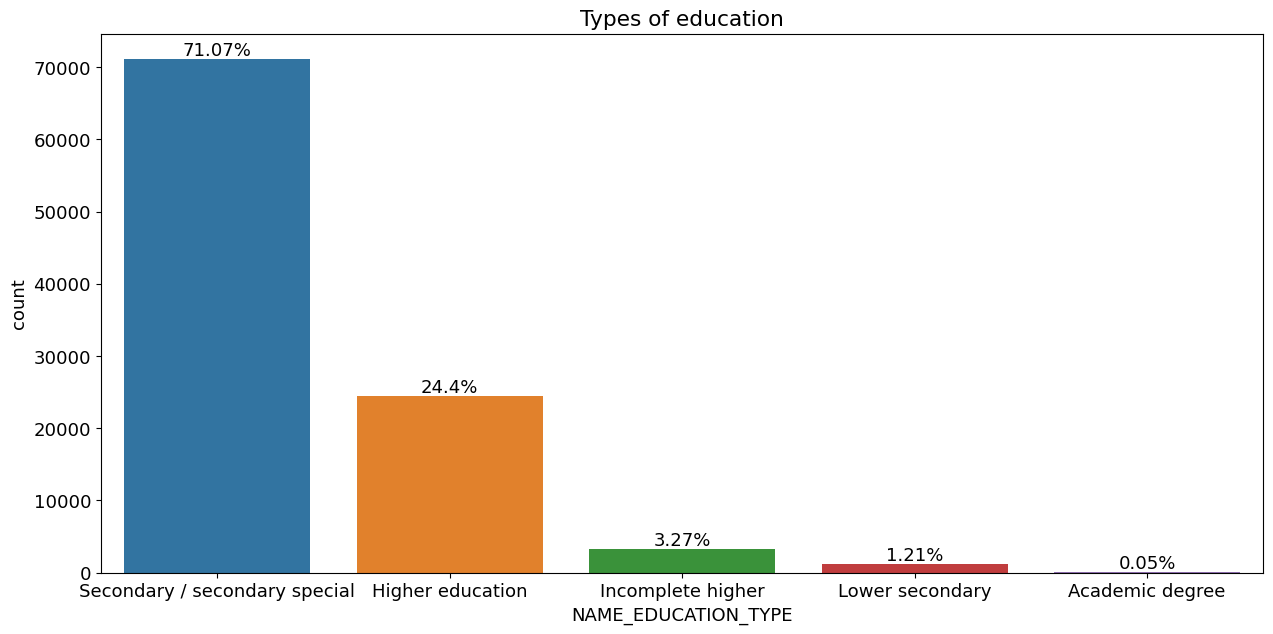

In [78]:
mat.rcParams['font.size'] = 13
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x= df['NAME_EDUCATION_TYPE'])
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
    

plt.title('Types of education')
plt.show()

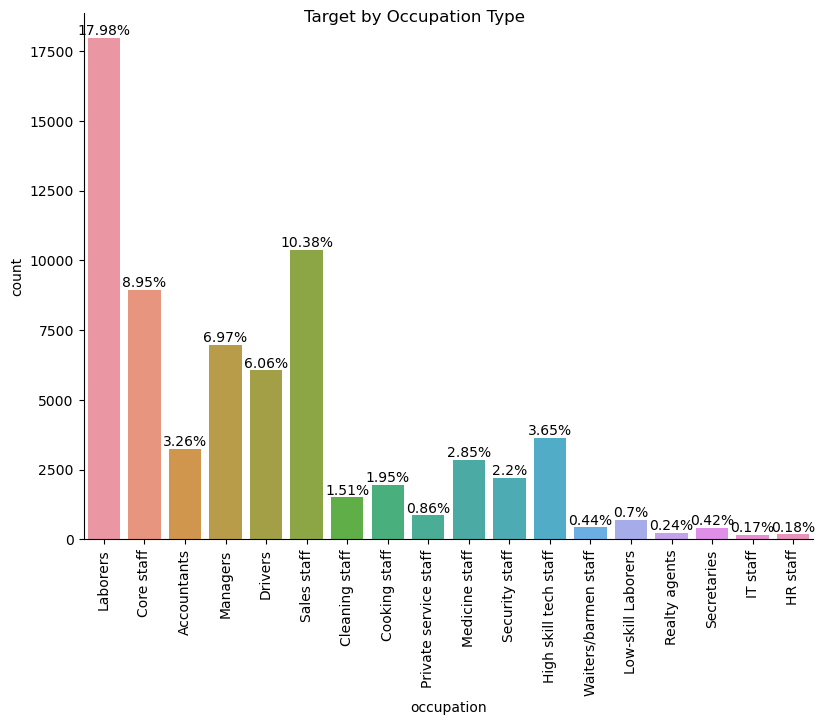

In [28]:
g = sb.catplot(x="OCCUPATION_TYPE",  data=df,
                kind="count", height=6, aspect=1.4, orient="v")
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=90)
g.fig.suptitle("Target by Occupation Type")
g.set(xlabel="occupation", ylabel="count")
for bar in g.ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    g.ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')

plt.show()

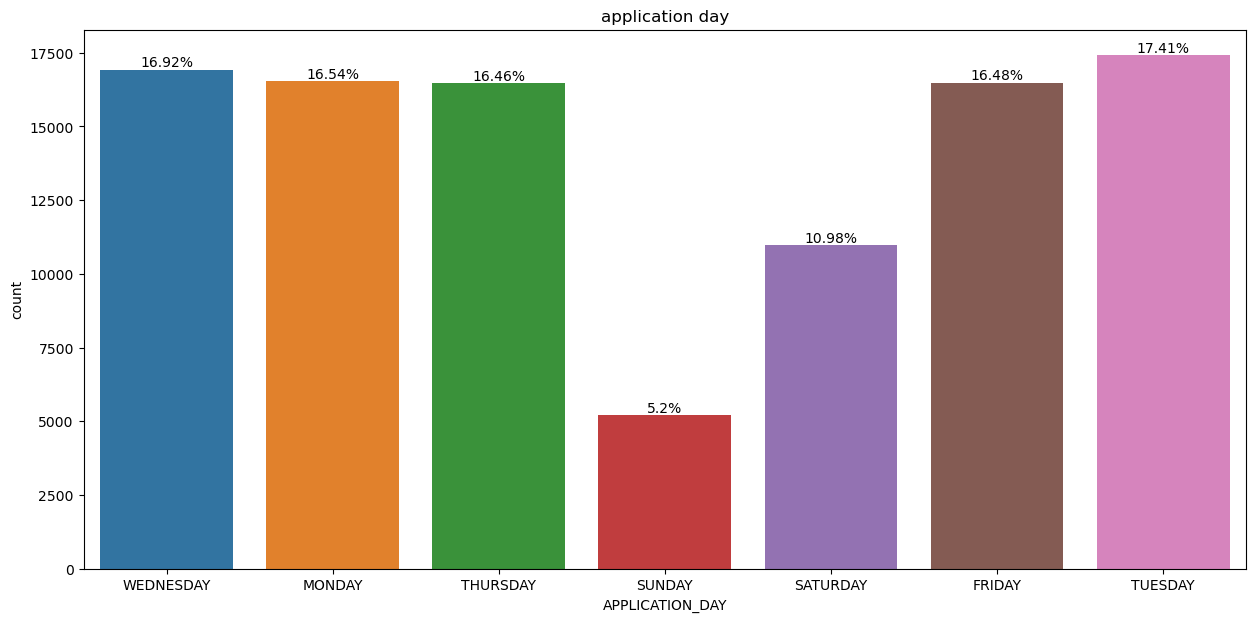

In [30]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x= df['APPLICATION_DAY'])
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
    

plt.title('application day')
plt.show()

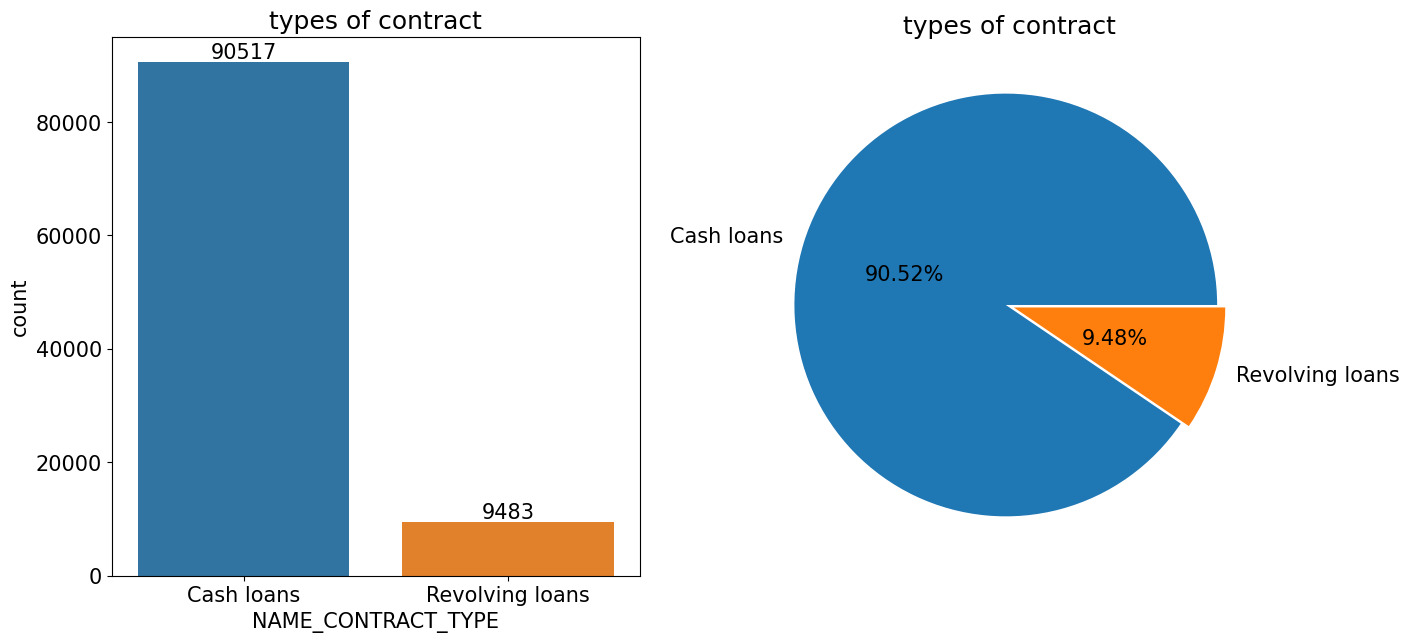

In [77]:
mat.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.countplot(x= df['NAME_CONTRACT_TYPE'],ax = ax[0])
data = df['NAME_CONTRACT_TYPE'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
    
ax[0].set_title('types of contract')
plt.title('types of contract')
plt.show()


# bivariate

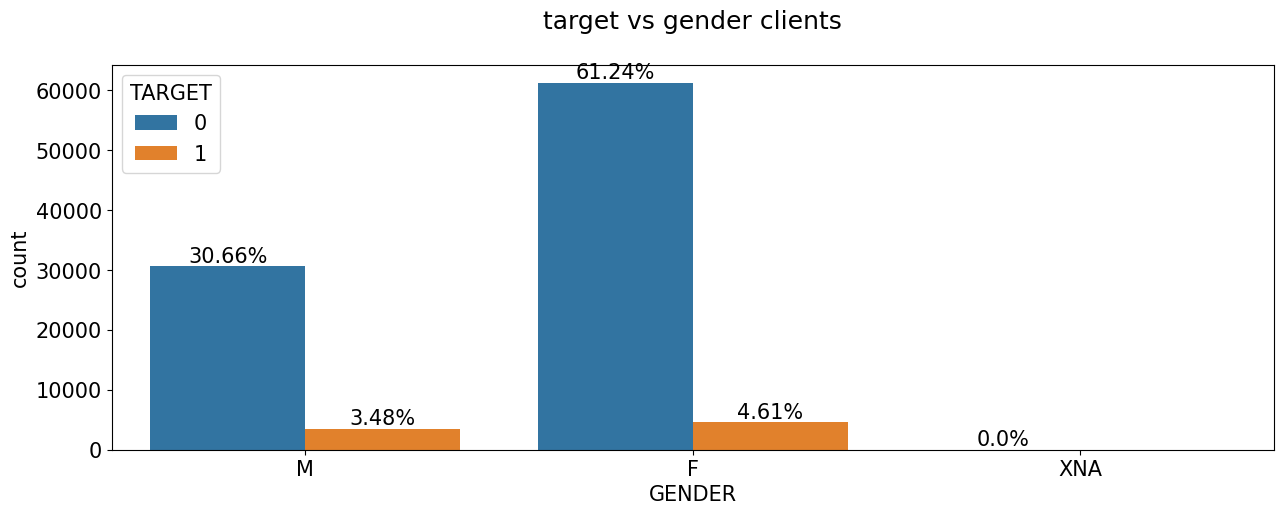

In [76]:
mat.rcParams['font.size'] = 15
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs gender clients\n')
sb.countplot(hue= 'TARGET',x= 'GENDER', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

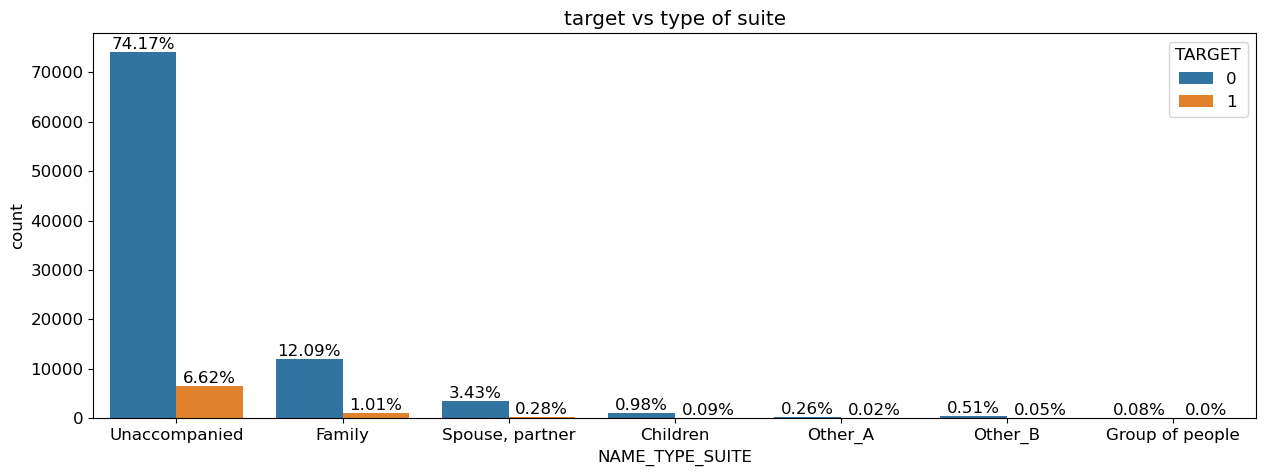

In [74]:
mat.rcParams['font.size'] = 12
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs type of suite')
sb.countplot(hue= 'TARGET',x= 'NAME_TYPE_SUITE', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

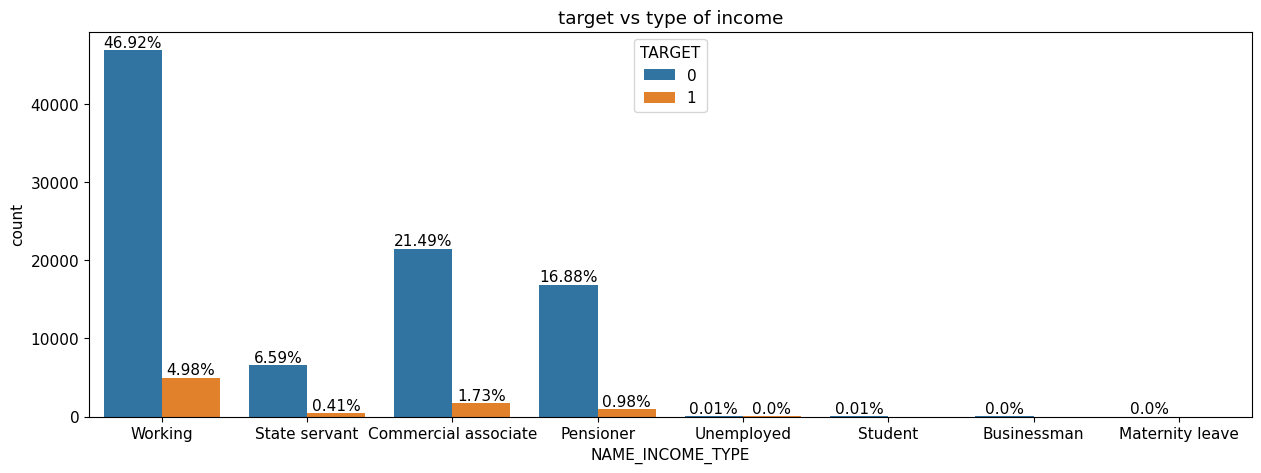

In [73]:
mat.rcParams['font.size'] = 11
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs type of income')
sb.countplot(hue= 'TARGET',x= 'NAME_INCOME_TYPE', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

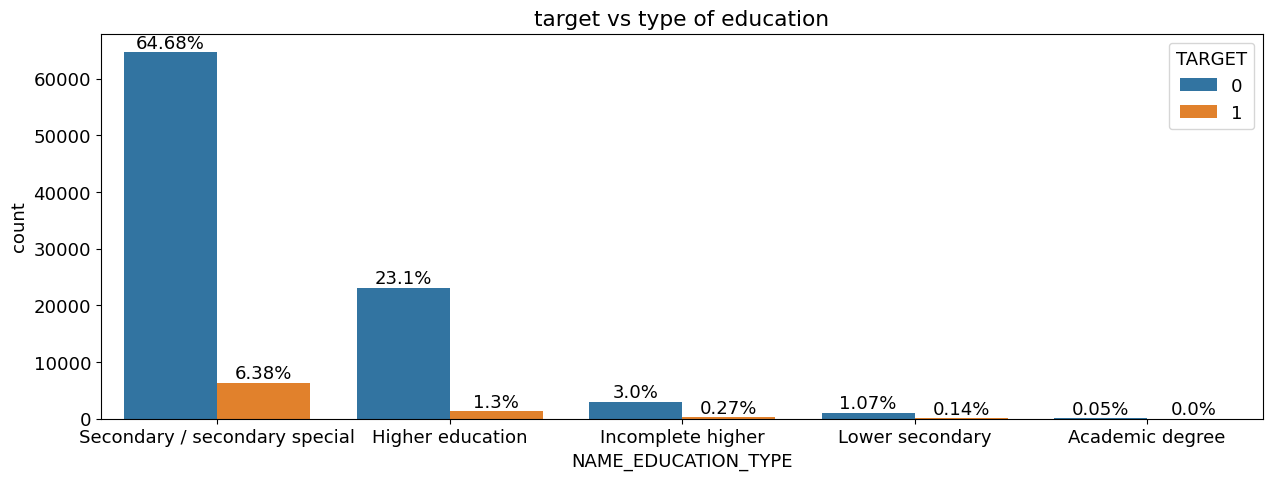

In [68]:
mat.rcParams['font.size'] = 13
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs type of education')
sb.countplot(hue= 'TARGET',x= 'NAME_EDUCATION_TYPE', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

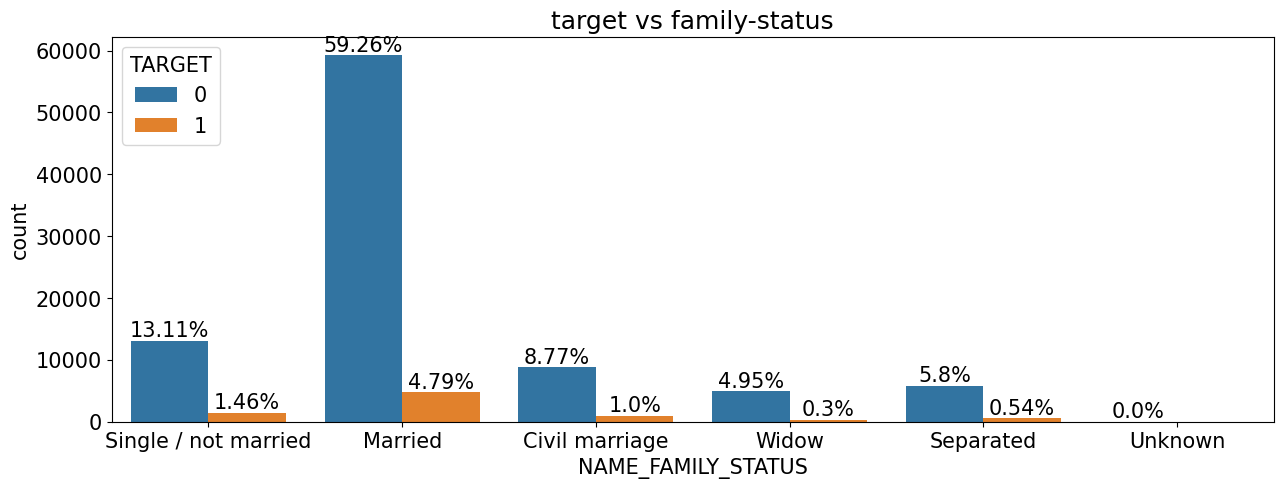

In [66]:
mat.rcParams['font.size'] = 15
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs family-status')
sb.countplot(hue= 'TARGET',x= 'NAME_FAMILY_STATUS', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

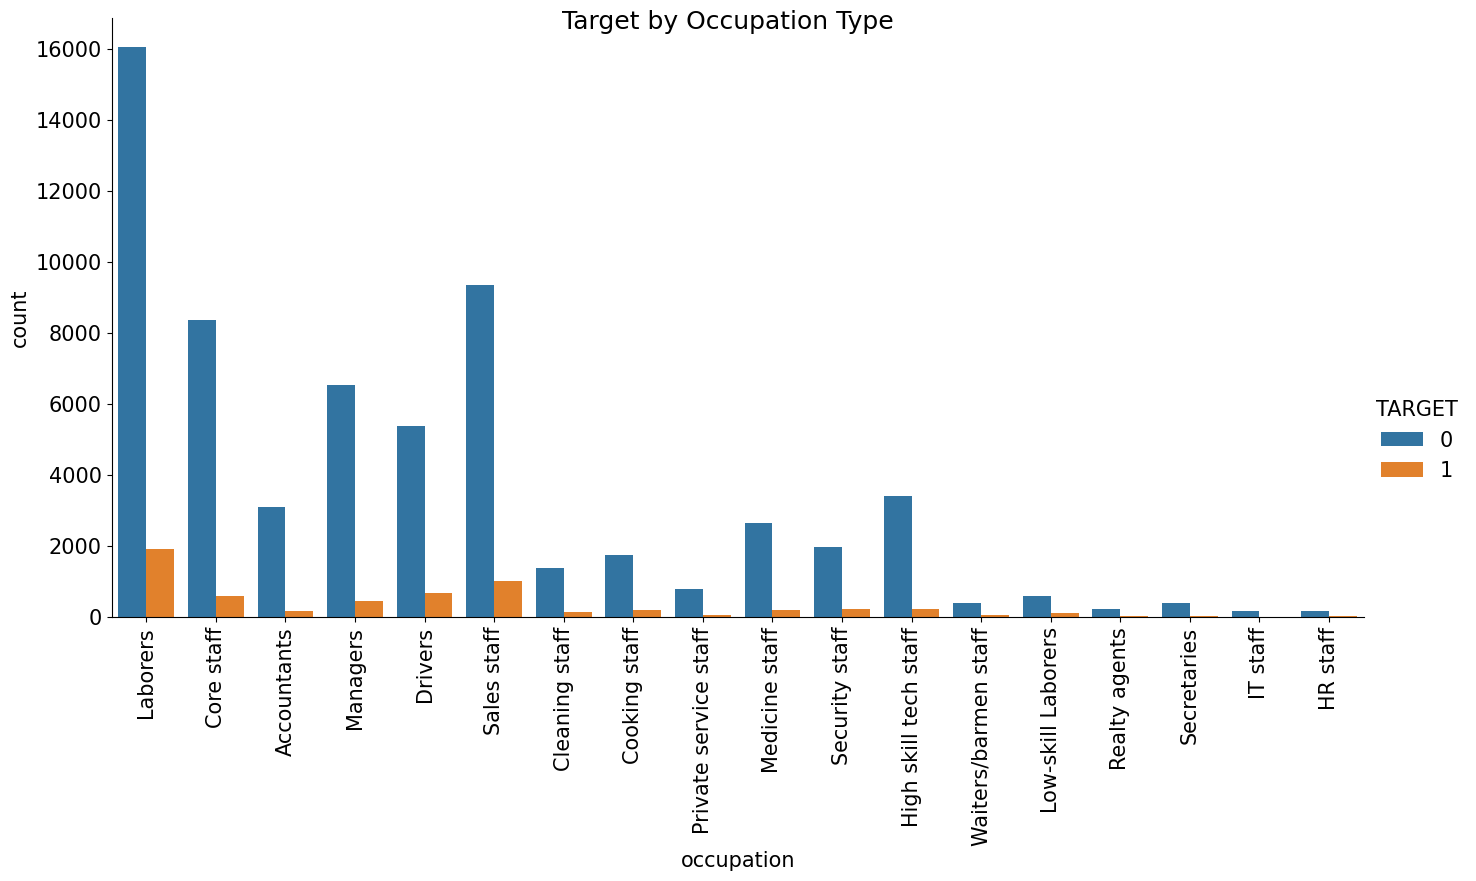

In [64]:
mat.rcParams['font.size'] = 15
g = sb.catplot(x="OCCUPATION_TYPE", hue = 'TARGET', data=df,
                kind="count", height=7,aspect = 2, orient="v")
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=90)
g.fig.suptitle("Target by Occupation Type")
g.set(xlabel="occupation", ylabel="count")
plt.show()

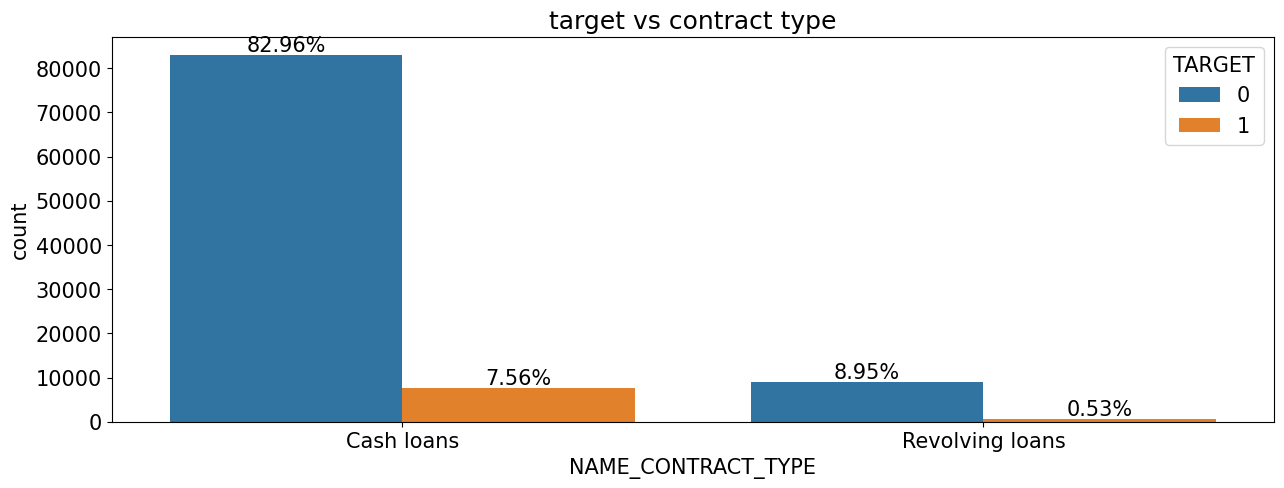

In [65]:
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs contract type')
sb.countplot(hue= 'TARGET',x= 'NAME_CONTRACT_TYPE', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

In [5]:
non_defaulters = df[df['TARGET']== 0]
defaulters = df[df['TARGET']== 1]

In [25]:
defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,Laborers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,216008,1,Cash loans,M,N,Y,0,247500.0,509400.0,450000.0,...,586,1,1,0,1,0,Laborers,1.0,FRIDAY,1
99932,216017,1,Cash loans,F,N,N,0,180000.0,485640.0,450000.0,...,767,1,1,1,1,0,Sales staff,2.0,FRIDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,1669,1,1,0,1,0,Laborers,2.0,SATURDAY,1


In [26]:
non_defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


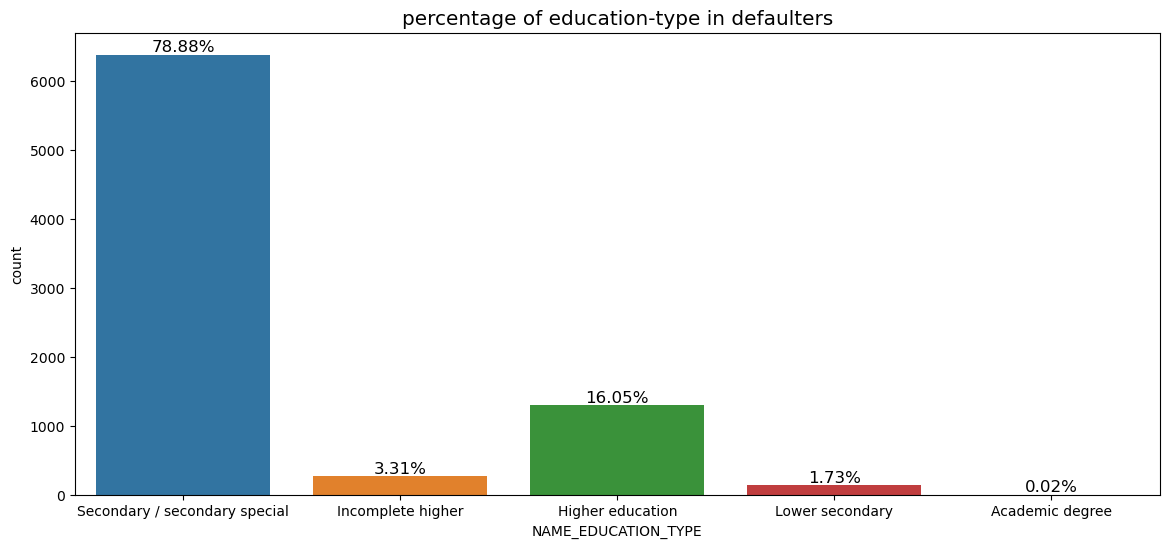

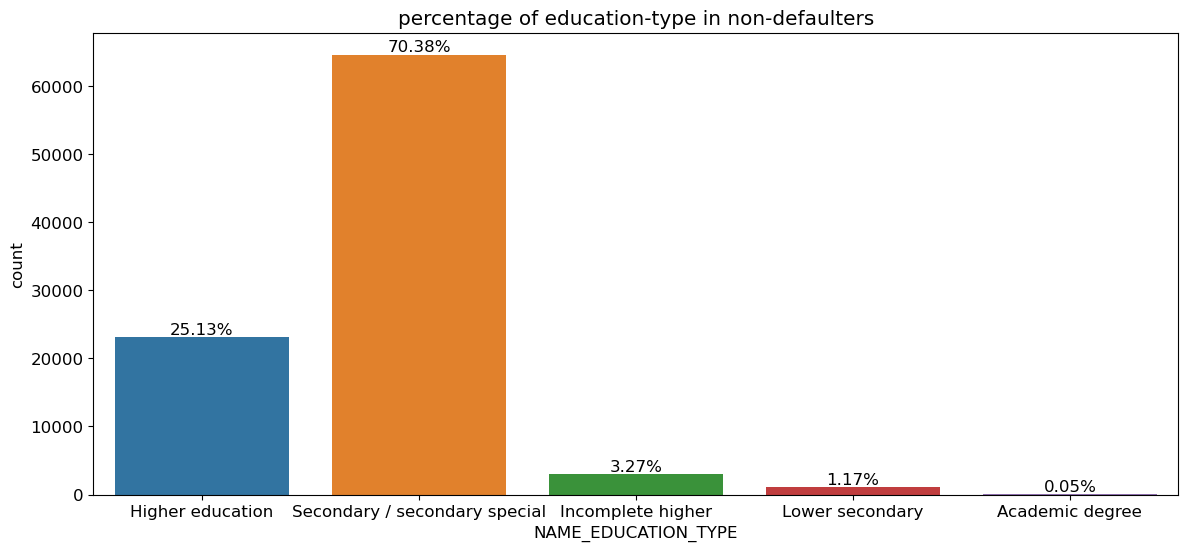

In [7]:
fig, ax = plt.subplots(figsize= (14,6))
ax = sb.countplot(x = defaulters["NAME_EDUCATION_TYPE"])
mat.rcParams['font.size'] = 12
ax.set_title('percentage of education-type in defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(defaulters))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')

fig, ax = plt.subplots(figsize= (14,6))
ax = sb.countplot(x = non_defaulters["NAME_EDUCATION_TYPE"])
mat.rcParams['font.size'] = 12
ax.set_title('percentage of education-type in non-defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(non_defaulters))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

# INTERPRETATION:- In both Defaulters and Non defaulters education is high in the category secondary/secondary special and followed by Higher education.

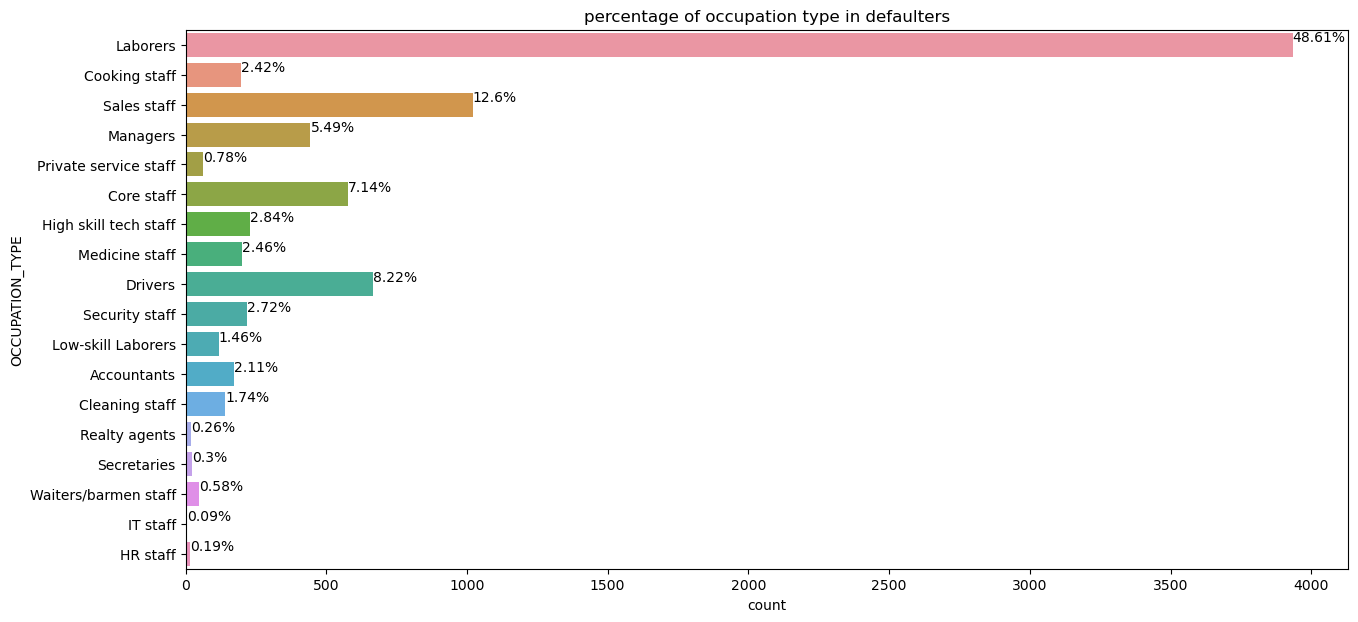

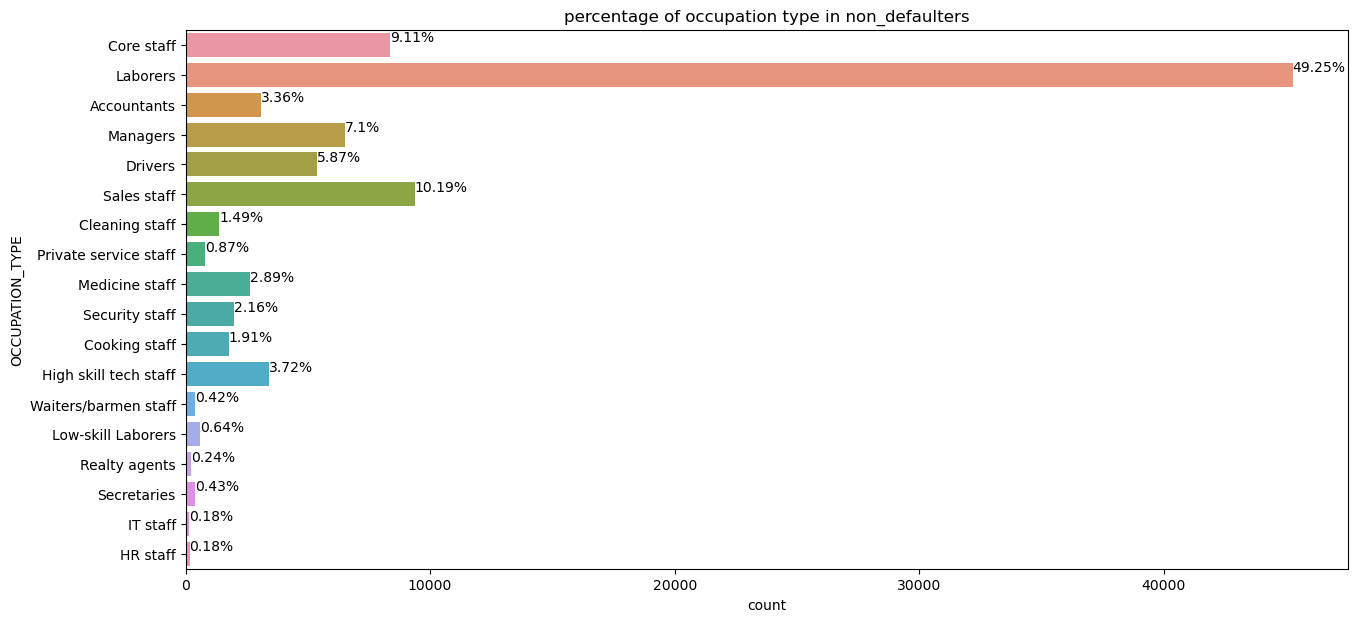

In [28]:
fig, ax = plt.subplots(figsize= (15,7))
ax = sb.countplot(y = defaulters["OCCUPATION_TYPE"])
mat.rcParams['font.size'] = 10
ax.set_title('percentage of occupation type in defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_width()/len(defaulters))*100,2)}%'
    x = bar.get_width()  
    y= bar.get_y()+ bar.get_height()/2 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'left')
fig, ax = plt.subplots(figsize= (15,7))
ax = sb.countplot(y = non_defaulters["OCCUPATION_TYPE"])
mat.rcParams['font.size'] = 10
ax.set_title('percentage of occupation type in non_defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_width()/len(non_defaulters))*100,2)}%'
    x = bar.get_width()  
    y= bar.get_y()+ bar.get_height()/2 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'left')
plt.show()

# INTERPRETATION:- In occupation Laberors are high 48% are defaulters and 49% are non-defaulters.

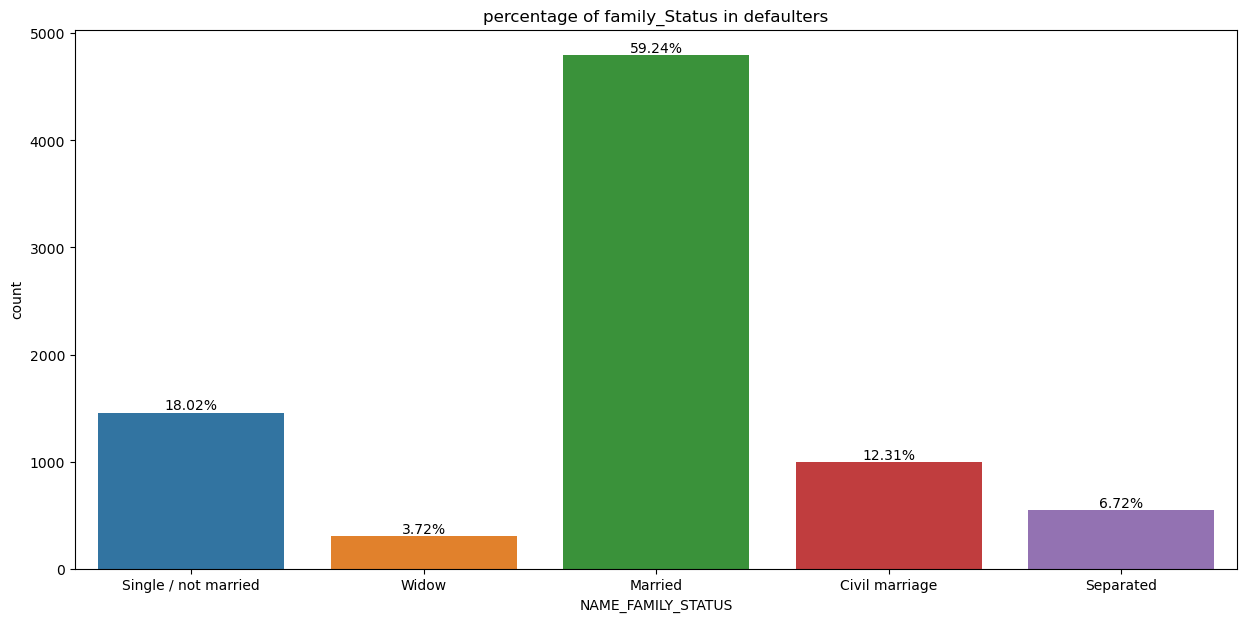

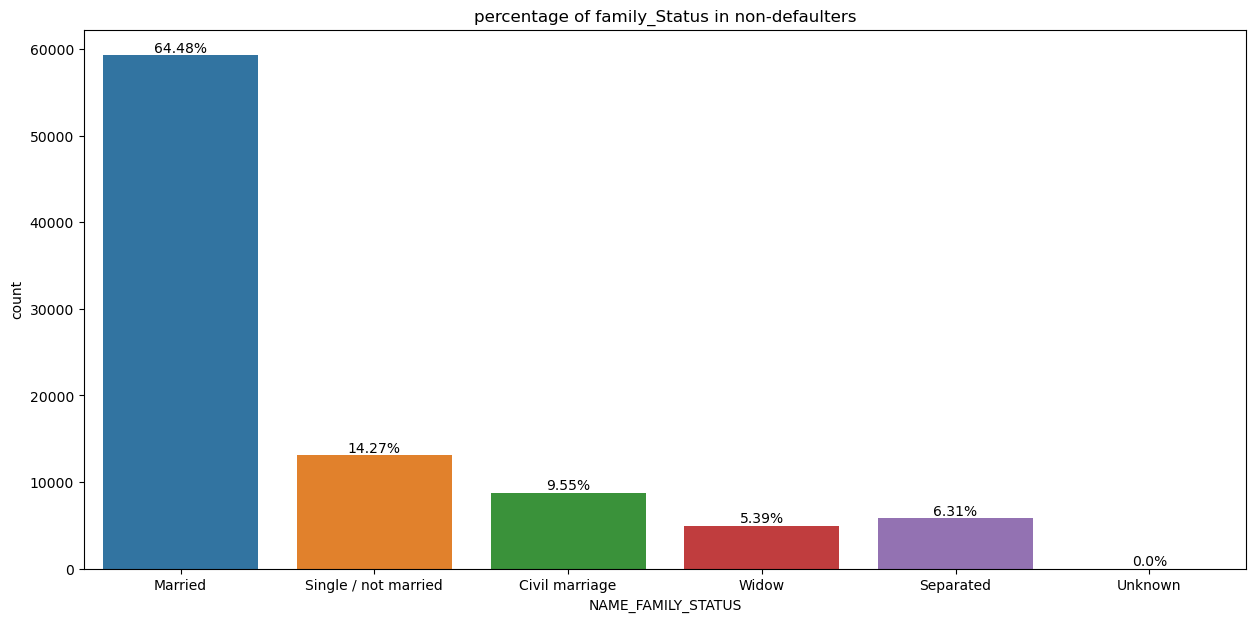

In [29]:
fig, ax = plt.subplots(figsize= (15,7))
ax = sb.countplot(x = defaulters["NAME_FAMILY_STATUS"])
mat.rcParams['font.size'] = 10
ax.set_title('percentage of family_Status in defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(defaulters))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')

fig, ax = plt.subplots(figsize= (15,7))
ax = sb.countplot(x = non_defaulters["NAME_FAMILY_STATUS"])
mat.rcParams['font.size'] = 10
ax.set_title('percentage of family_Status in non-defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(non_defaulters))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

# INTERPRETATION:- In family-status Married applicants are high. Most of the married people applied for loans. Next single/not married applicants applied for loan.

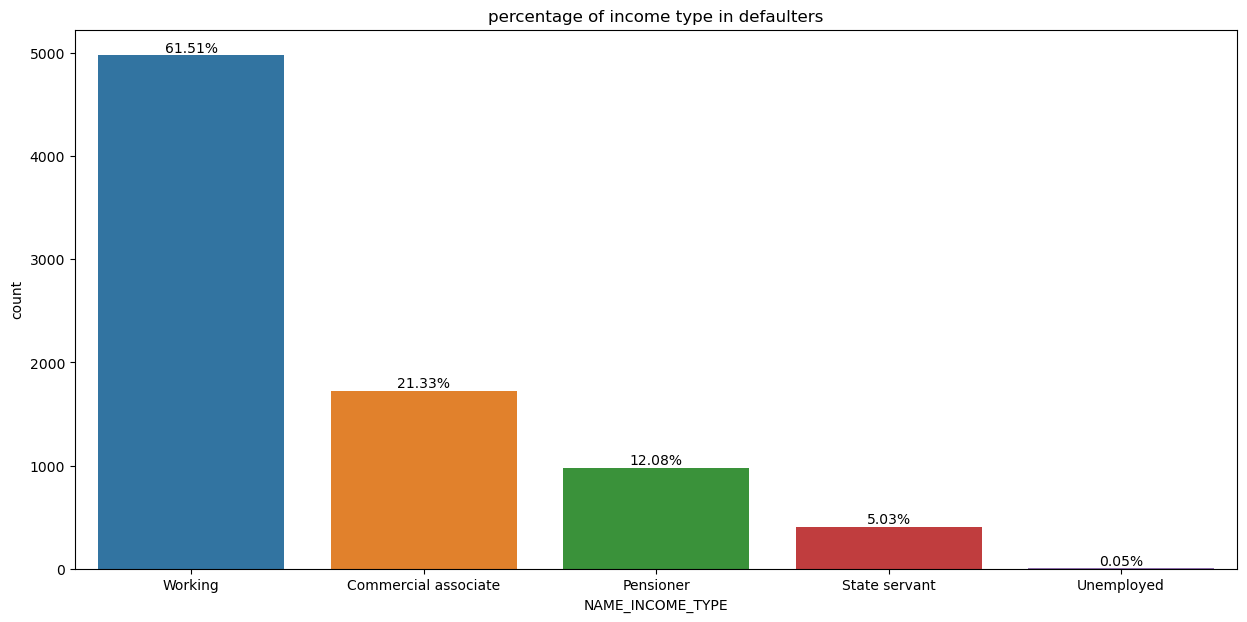

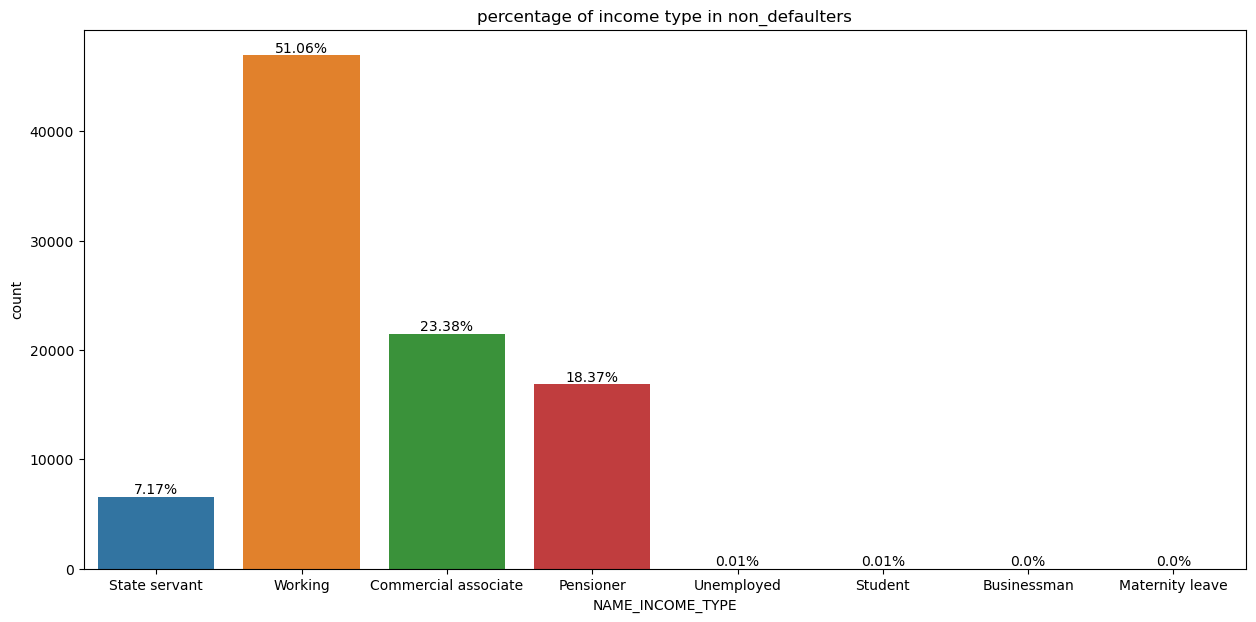

In [30]:
fig, ax = plt.subplots(figsize= (15,7))
ax = sb.countplot(x = defaulters["NAME_INCOME_TYPE"])
mat.rcParams['font.size'] = 10
ax.set_title('percentage of income type in defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(defaulters))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')

fig, ax = plt.subplots(figsize= (15,7))
ax = sb.countplot(x = non_defaulters["NAME_INCOME_TYPE"])
mat.rcParams['font.size'] = 10
ax.set_title('percentage of income type in non_defaulters')
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(non_defaulters))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

# INTERPRETATION:- In income type working inco-me is high for defaulters 61%. and Non-defaulters 51%. and then followed by commercial associative income type.

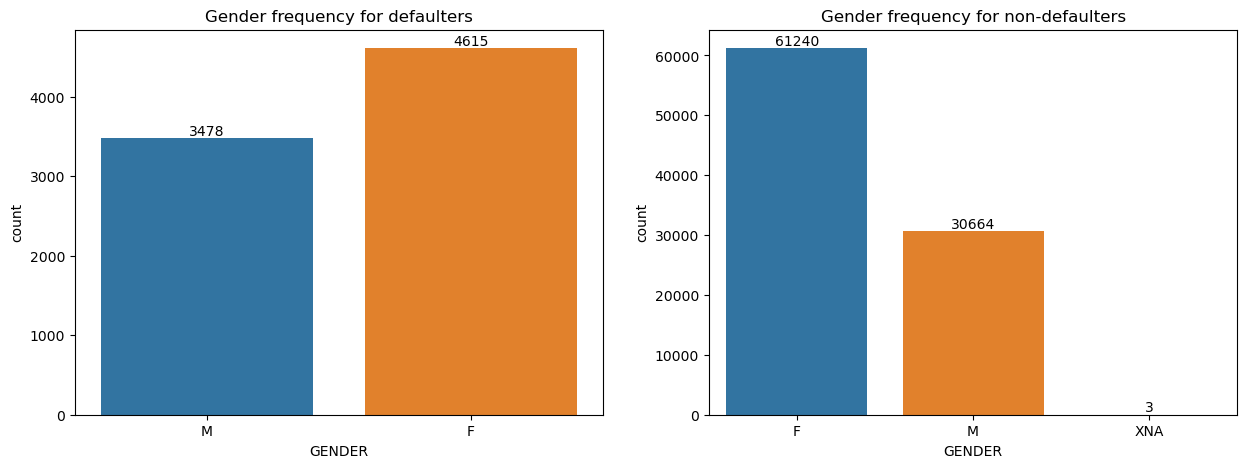

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Gender frequency for defaulters')
ax[1].set_title('Gender frequency for non-defaulters')
sb.countplot(x= 'GENDER' ,data = defaulters,ax= ax[0])
sb.countplot(x= 'GENDER' ,data = non_defaulters,ax= ax[1])
for bar in ax[0].patches:
    value1 = f'{round(bar.get_height(),2)}'
    x1 = bar.get_x() + bar.get_width()/2 
    y1= bar.get_height()  
    ax[0].annotate(value1,(x1,y1), va = 'bottom',ha = 'center')
    
for bar in ax[1].patches:
    value = f'{round(bar.get_height(),2)}'
    x2 = bar.get_x() + bar.get_width()/2 
    y2= bar.get_height()  
    ax[1].annotate(value,(x2,y2), va = 'bottom',ha = 'center')
    
plt.show()

# INTERPRETATION:- In both defaulters and non defaulters females are high. In defaulters females are 4615 and males are 3478. In non-defaulters 61240 females and 30664 males and 3 XNA applicants.

# Bi- variate analysis

categorical-categorical

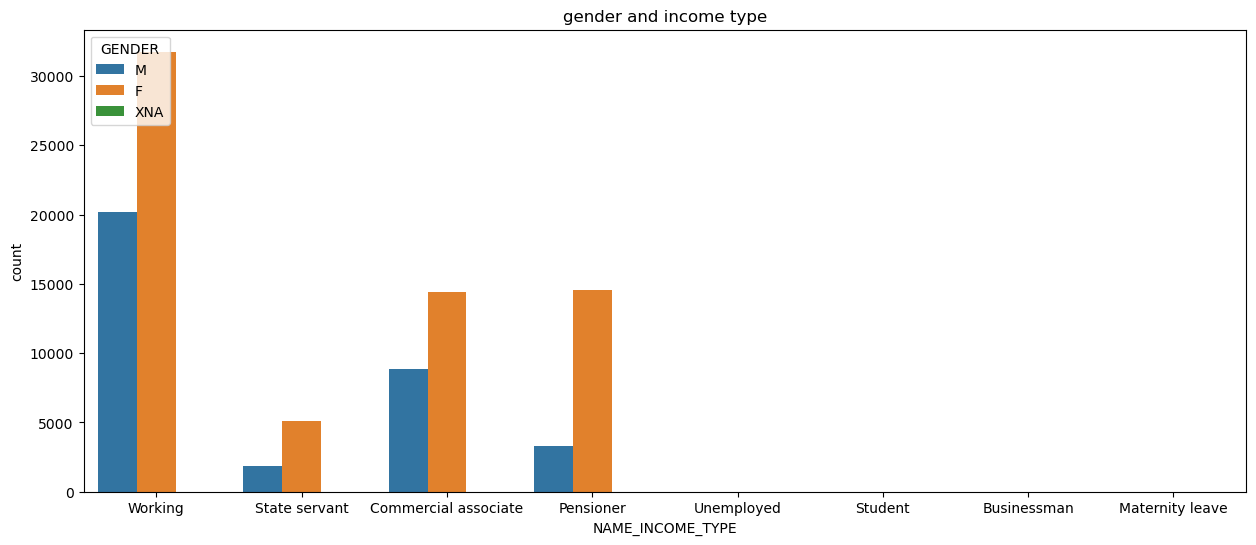

In [90]:
fig,ax = plt.subplots(figsize=(15,6))
ax.set_title('gender and income type')
sb.countplot(hue= 'GENDER',x= 'NAME_INCOME_TYPE', data = df)
plt.show()

# INTERPRETATION:- Gender vs Income type, Working females are high. unemployed, students, businessman, maternity leave applicants are 0. Here State servant, commercial associate, pensioner are some applicants.

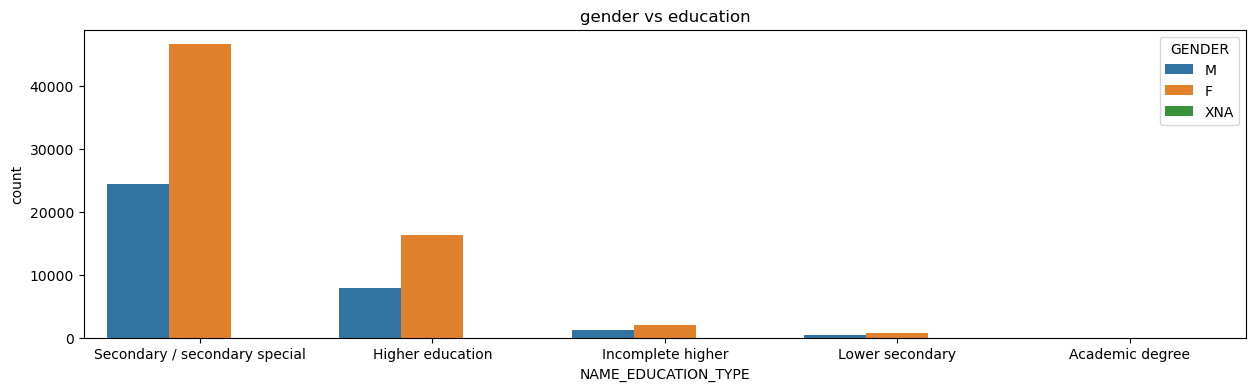

In [77]:
fig,ax = plt.subplots(figsize=(15,4))
ax.set_title('gender vs education')
g = sb.countplot(hue= 'GENDER',x= 'NAME_EDUCATION_TYPE', data = df)
plt.show()

# INTERPRETATION:- Here females high in every category of education. Secondary/secondary special have above 40000 females followed by higher education  below 20000 females. In Academic degree no applicants exist.

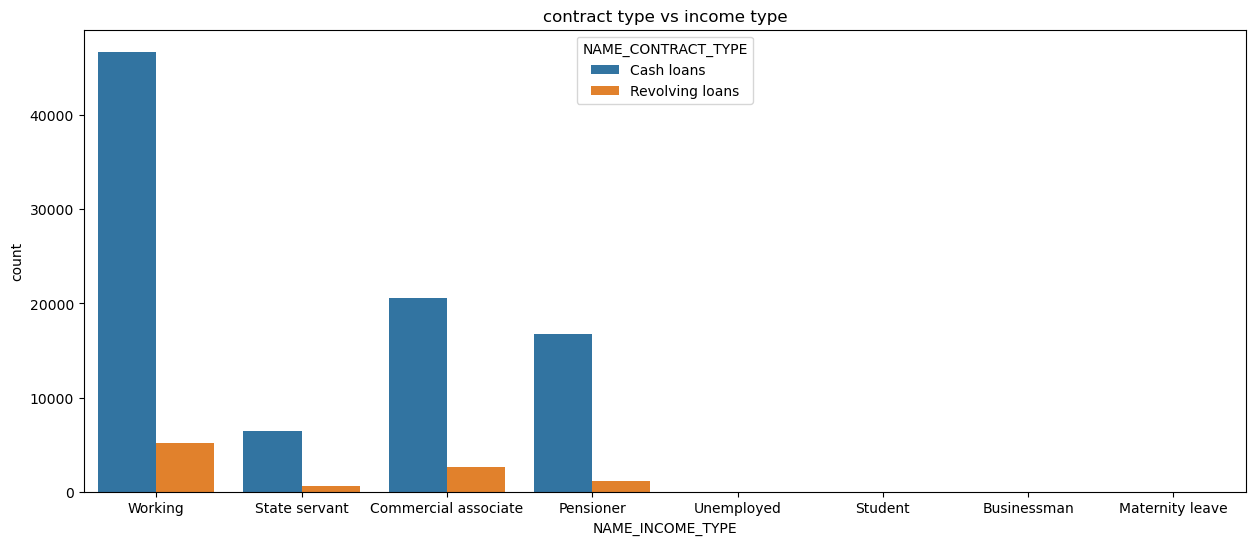

In [34]:
fig,ax = plt.subplots(figsize=(15,6))
ax.set_title('contract type vs income type')
sb.countplot(hue= 'NAME_CONTRACT_TYPE',x= 'NAME_INCOME_TYPE', data = df)
plt.show()

# INTERPRETATION:- In contract type, cash loans are high with above 40000 in working income type. The commercial associte also taking more cash loans.

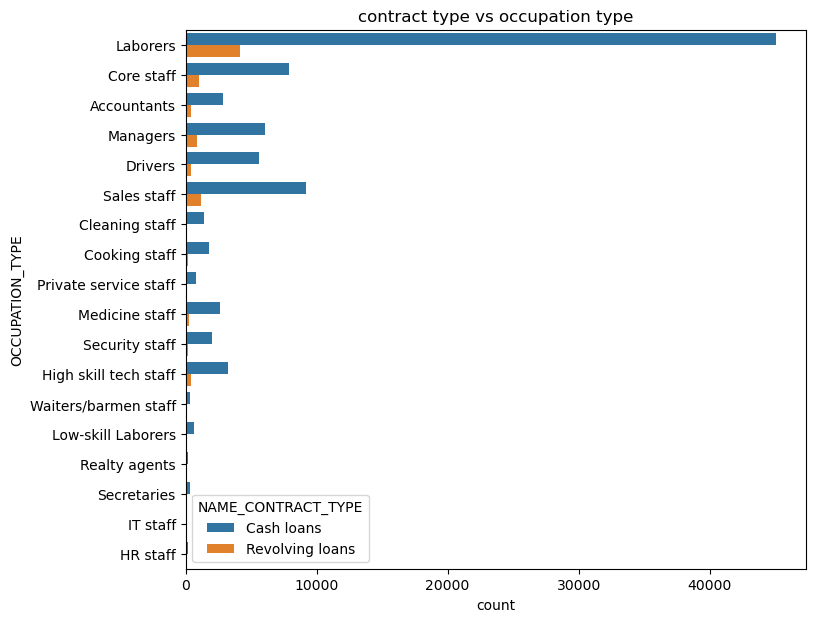

In [35]:
fig,ax = plt.subplots(figsize=(8,7))
ax.set_title('contract type vs occupation type')
sb.countplot(hue= 'NAME_CONTRACT_TYPE',y= 'OCCUPATION_TYPE', data = df)
plt.show()

# INTERPRETATION:- cash loans were taken by laborers above 40000 applicants. Revolving loans also taken by laborers.

categorical- numerical

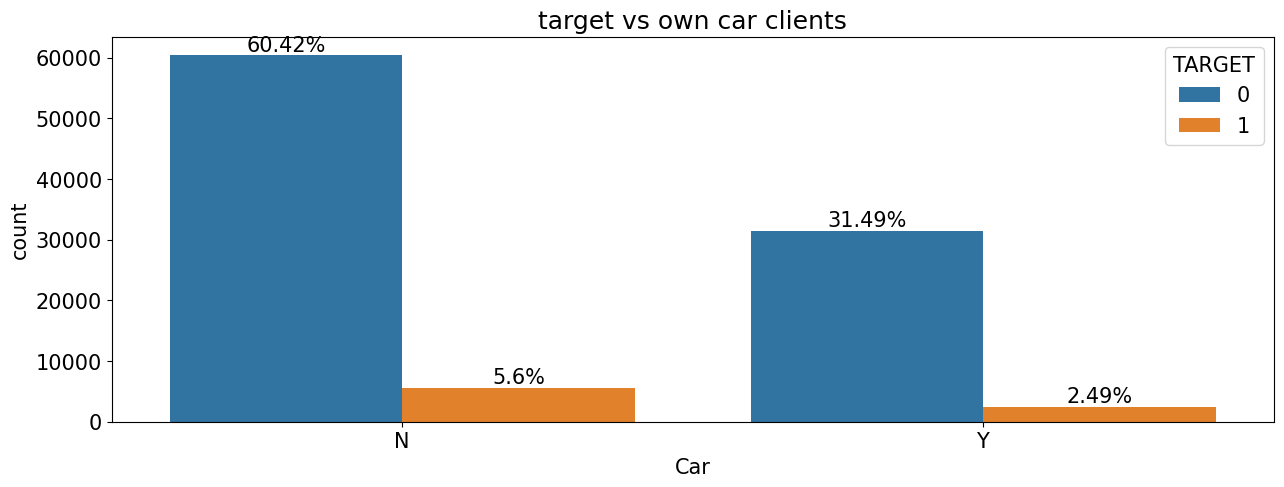

In [98]:
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs own car clients')
sb.countplot(hue= 'TARGET',x= 'Car', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center') 
plt.show()

# INTERPRETATION:- The loan applicants who have own car is 30000 non-defaulters have own car and below 10000  defaulters have own car.  

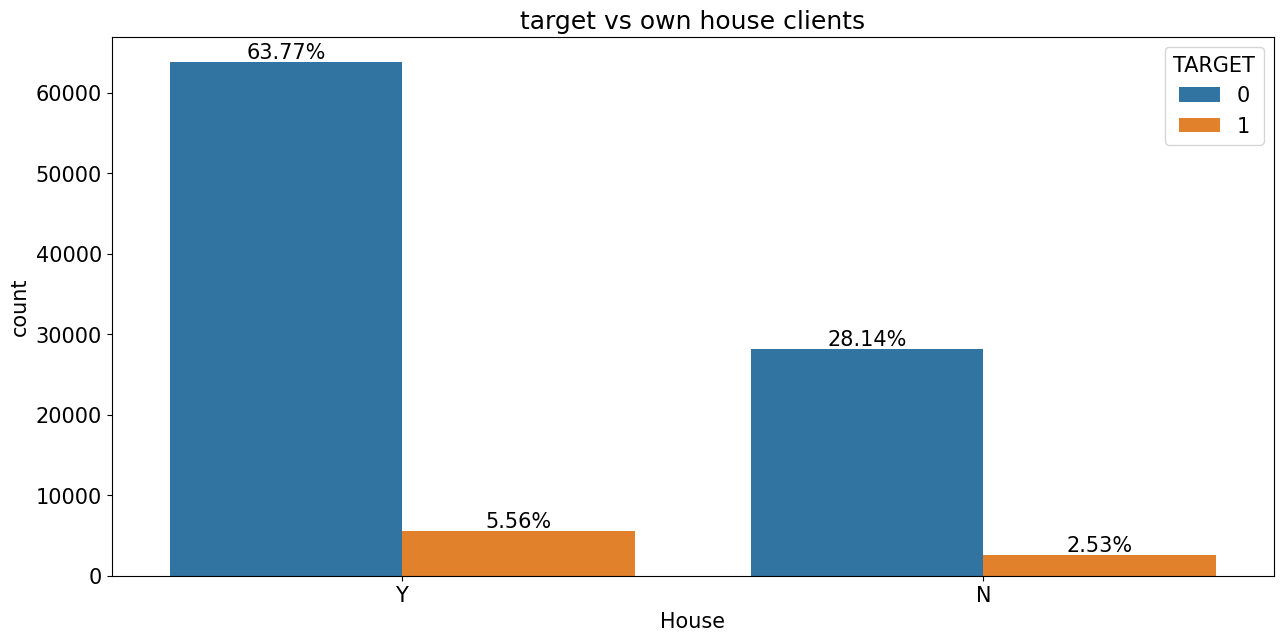

In [99]:
fig,ax = plt.subplots(figsize=(15,7))
ax.set_title('target vs own house clients')
sb.countplot(hue= 'TARGET',x= 'House', data = df)
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/len(df))*100,2)}%'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height() 
    ax.annotate(percentage,(x,y), va = 'bottom',ha = 'center')
plt.show()

# INTERPRETATION:- The loan applicants who have own house is 30000 non-defaulters have own house and below 10000 defaulters have own house.

numerical-numerical

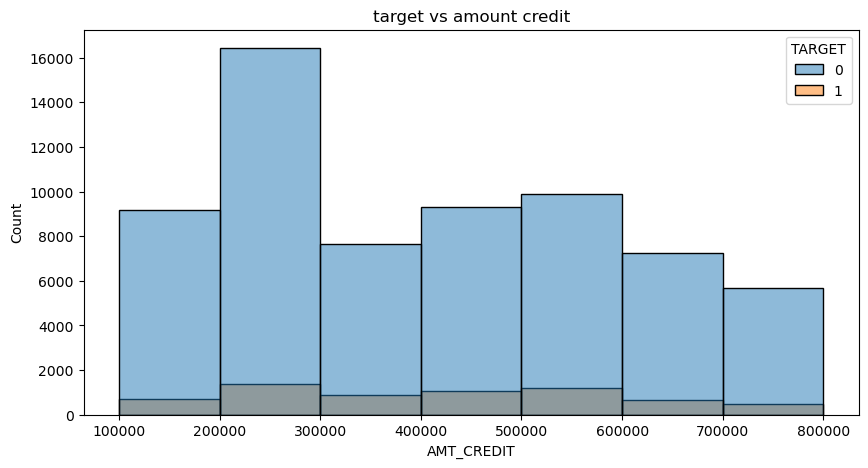

In [38]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('target vs amount credit')
bins = [100000,200000,300000,400000,500000,600000,700000,800000]
sb.histplot(x=df['AMT_CREDIT'], hue =df['TARGET'],bins=bins)
plt.show()

# INTERPRETATION:- Observed that credits between 200000 and 300000 have more credits with 16000 non-defaulters. and 2000 defaulters.

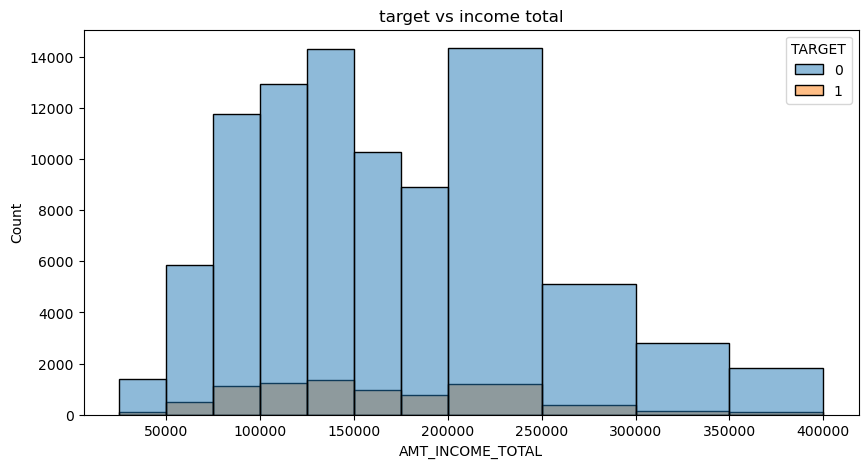

In [39]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('target vs income total')
bins = [25000,50000,75000,100000,125000,150000,175000,200000,250000,300000,350000,400000]
sb.histplot(x=df['AMT_INCOME_TOTAL'], hue =df['TARGET'],bins=bins)
plt.show()

# INTERPRETATION:-Observed that total income between 200000 and 250000 have more income with 14000 non-defaulters. and 2000 defaulters

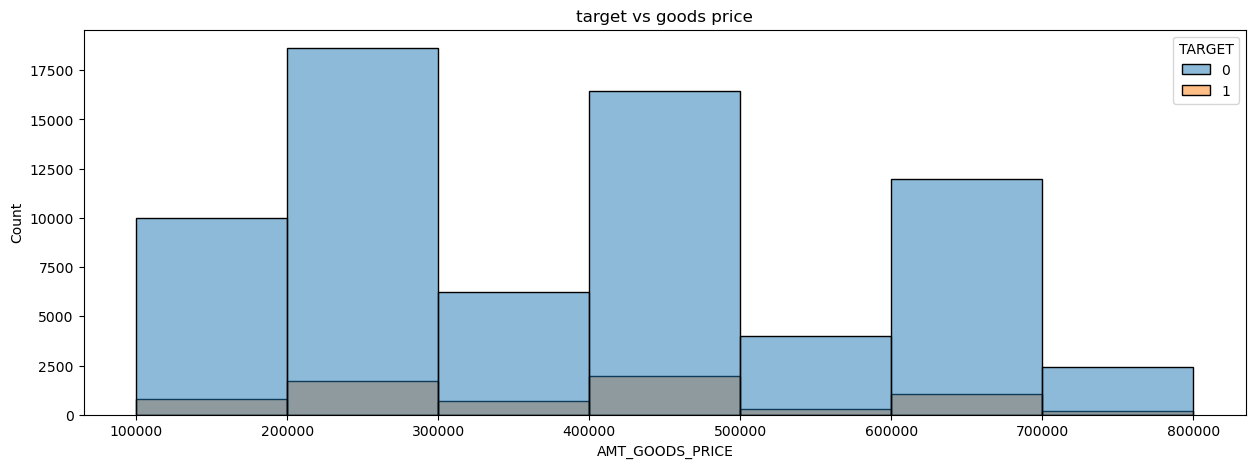

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs goods price')
bins = [100000,200000,300000,400000,500000,600000,700000,800000]
sb.histplot(x=df['AMT_GOODS_PRICE'], hue =df['TARGET'],bins=bins)
plt.show()

# INTERPRETATION:- The goods-price between 200000 and 300000 have high price with 17500 non-defaulters and the goods- price between 400000 and 500000 have high price with 2500 defaulters.

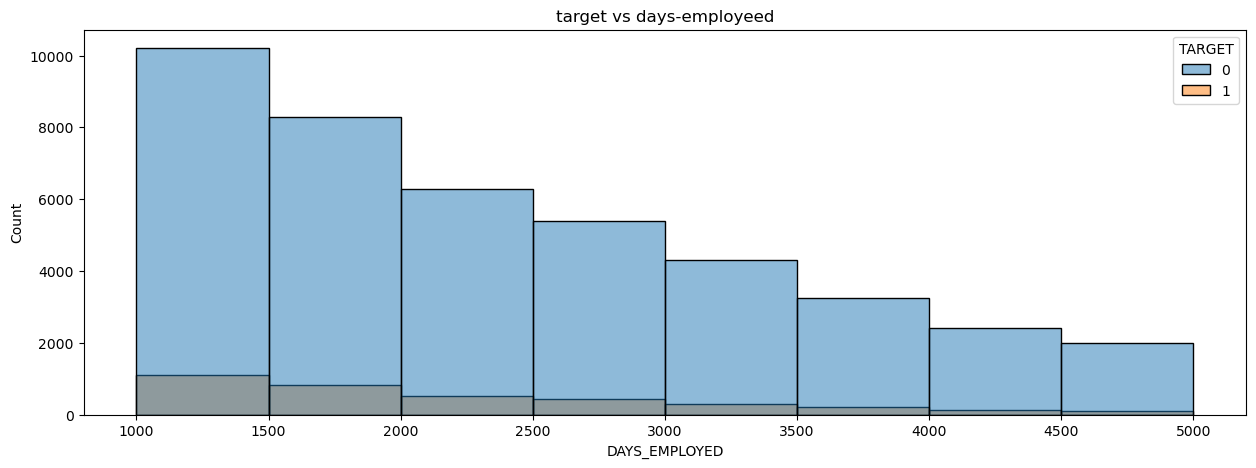

In [41]:
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('target vs days-employeed')
bins = [1000,1500,2000,2500,3000,3500,4000,4500,5000]
sb.histplot(x=df['DAYS_EMPLOYED'], hue =df['TARGET'],bins = bins)
plt.show()

# INTERPRETATION:- Observed that days employed between 1000 and 1500 have more days with 10000 non-defaulters. and  below 2000 defaulters¶

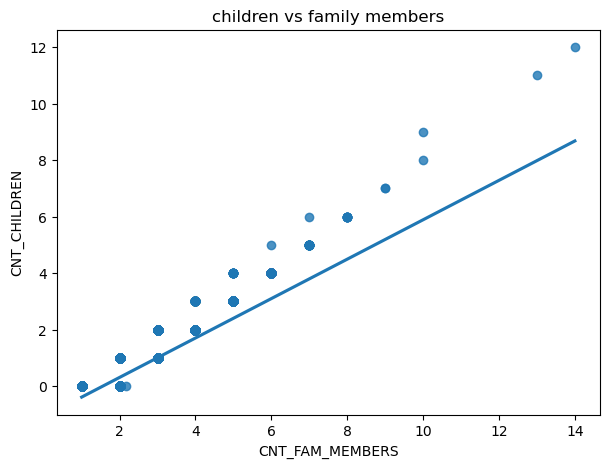

In [42]:
fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('children vs family members')
sb.regplot(x=df['CNT_FAM_MEMBERS'], y =df['CNT_CHILDREN'])
plt.show()

# INTERPRETATION:- The scatter plot is relationship between two columns Here Family-members and children are highly correlated to each other.

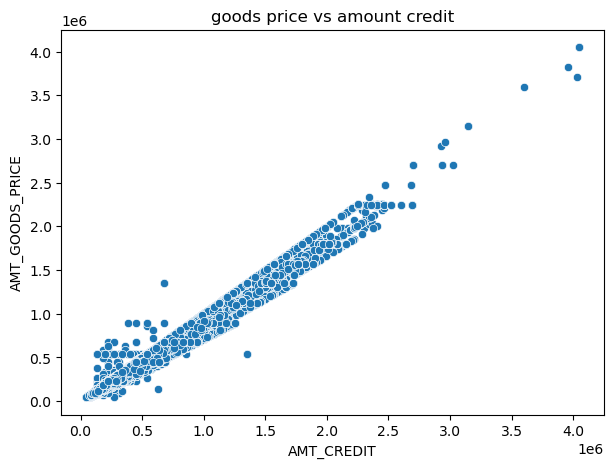

In [43]:
fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('goods price vs amount credit')
sb.scatterplot(x=df['AMT_CREDIT'], y =df['AMT_GOODS_PRICE'])
plt.show()

# INTERPRETATION:- The column credit and goods-price are highly correlated with each other. the correlation value is 0.99.

# Multivariate analysis

In [85]:
defualt = df[(df['NAME_INCOME_TYPE']=='Working') & (df['GENDER']!='XNA') & 
            (df['NAME_EDUCATION_TYPE']=='Secondary / secondary special') & (df['TOTAL_DOC_SUBMITTED']==1) &
            (df['NAME_CONTRACT_TYPE']=='Cash loans') & (df['House']=='Y')& 
            (df['AMT_GOODS_PRICE']>=200000) & (df['AMT_GOODS_PRICE']<=300000)& (df['AMT_INCOME_TOTAL']>=100000)&
            (df['AMT_INCOME_TOTAL']<=250000) & (df['DAYS_EMPLOYED']>=1000)& (df['DAYS_EMPLOYED']<=1500)]
defualt

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
27,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,270000.0,...,1234,1,1,0,1,0,Laborers,3.0,SATURDAY,1
508,100585,0,Cash loans,M,N,Y,0,126000.0,284400.0,225000.0,...,1374,1,1,1,1,0,Laborers,2.0,THURSDAY,1
512,100589,0,Cash loans,M,N,Y,0,103500.0,302076.0,270000.0,...,1458,1,1,1,1,0,NaN,1.0,SUNDAY,1
637,100727,0,Cash loans,F,Y,Y,0,112500.0,284400.0,225000.0,...,1386,1,1,0,1,0,Sales staff,1.0,TUESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,213778,0,Cash loans,F,Y,Y,0,112500.0,225000.0,225000.0,...,1261,1,1,1,1,0,NaN,2.0,SATURDAY,1
98606,214493,0,Cash loans,M,Y,Y,1,225000.0,263686.5,238500.0,...,1067,1,1,0,1,1,NaN,3.0,WEDNESDAY,1
98949,214891,1,Cash loans,M,N,Y,0,225000.0,254700.0,225000.0,...,1273,1,1,0,1,0,Laborers,2.0,THURSDAY,1
99085,215043,0,Cash loans,M,Y,Y,0,157500.0,354276.0,292500.0,...,1009,1,1,0,1,0,Laborers,2.0,FRIDAY,1


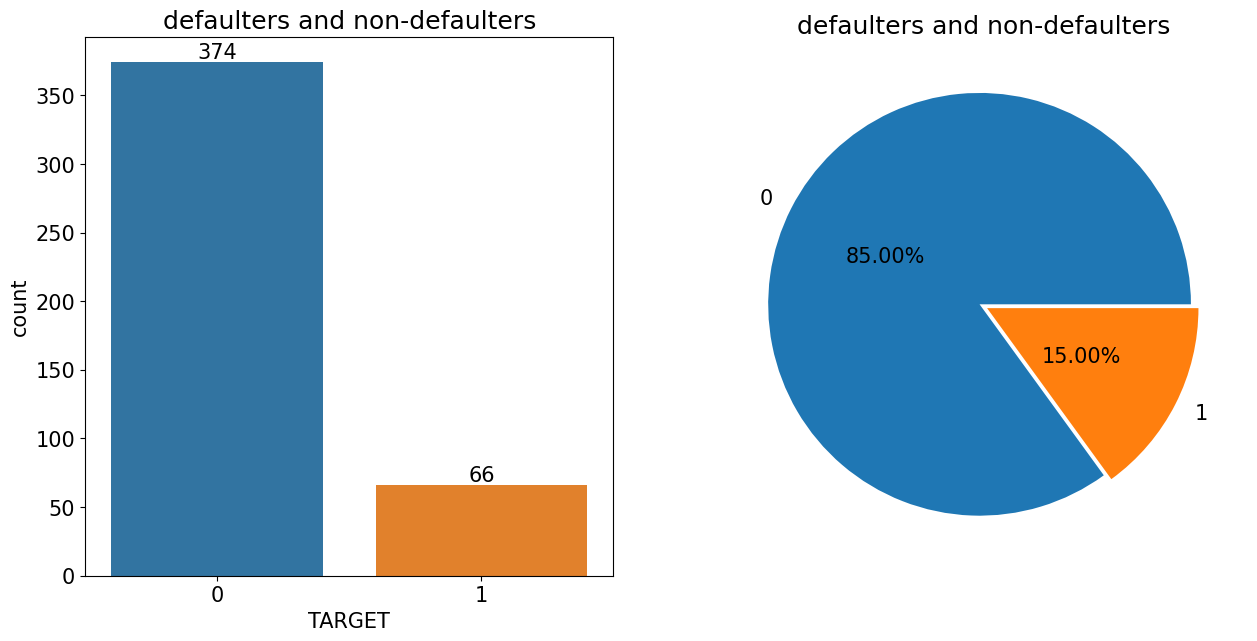

In [86]:
mat.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.countplot(x= defualt['TARGET'],ax = ax[0])
data = defualt['TARGET'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
    
ax[0].set_title('defaulters and non-defaulters')
plt.title('defaulters and non-defaulters')
plt.show()

# INTERPRETATION:- From bivariate analysis, I filtered some conditions and non-defaulters 85% and defaulters 15% . In values non-defaulters 374 and defaulters 66 applicants.

In [100]:
df2=df[(df['OCCUPATION_TYPE']== 'Laborers')&(df['NAME_FAMILY_STATUS']== 'Married')&(df['DAYS_EMPLOYED']>= 1000)&
       (df['DAYS_EMPLOYED']<= 1500)]
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
27,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,270000.0,...,1234,1,1,0,1,0,Laborers,3.0,SATURDAY,1
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
176,100205,0,Cash loans,F,N,Y,0,63000.0,808650.0,675000.0,...,1373,1,1,0,1,0,Laborers,2.0,TUESDAY,1
183,100213,0,Cash loans,F,N,N,2,49500.0,278460.0,225000.0,...,1282,1,1,0,1,1,Laborers,4.0,SUNDAY,1
205,100238,0,Cash loans,M,Y,Y,2,135000.0,781920.0,675000.0,...,1330,1,1,0,1,0,Laborers,4.0,SUNDAY,1


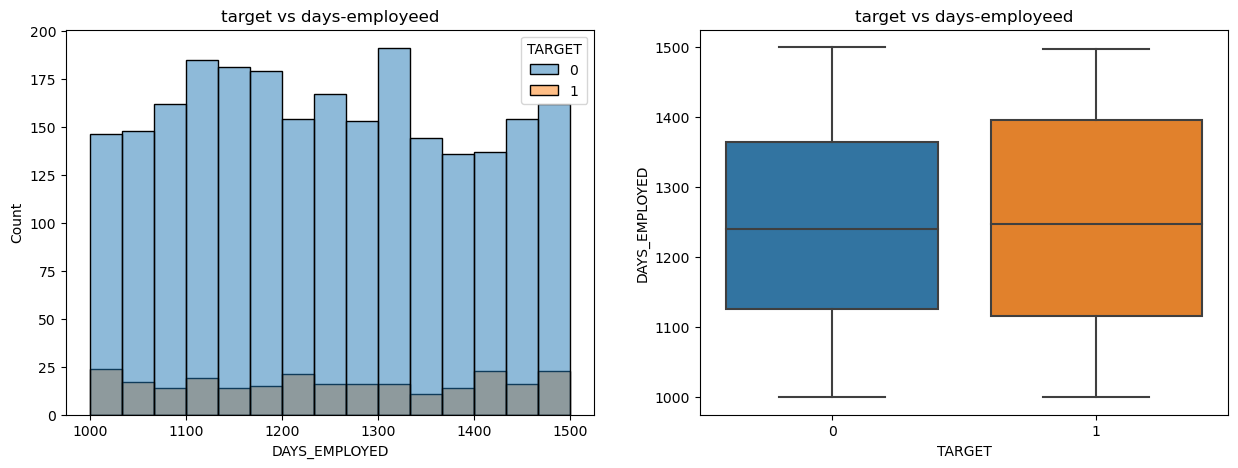

In [47]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('target vs days-employeed')
ax[1].set_title('target vs days-employeed')
sb.histplot(x=df2['DAYS_EMPLOYED'], hue =df2['TARGET'],ax=ax[0])
sb.boxplot(y=df2['DAYS_EMPLOYED'], x =df2['TARGET'],ax=ax[1])
plt.show()

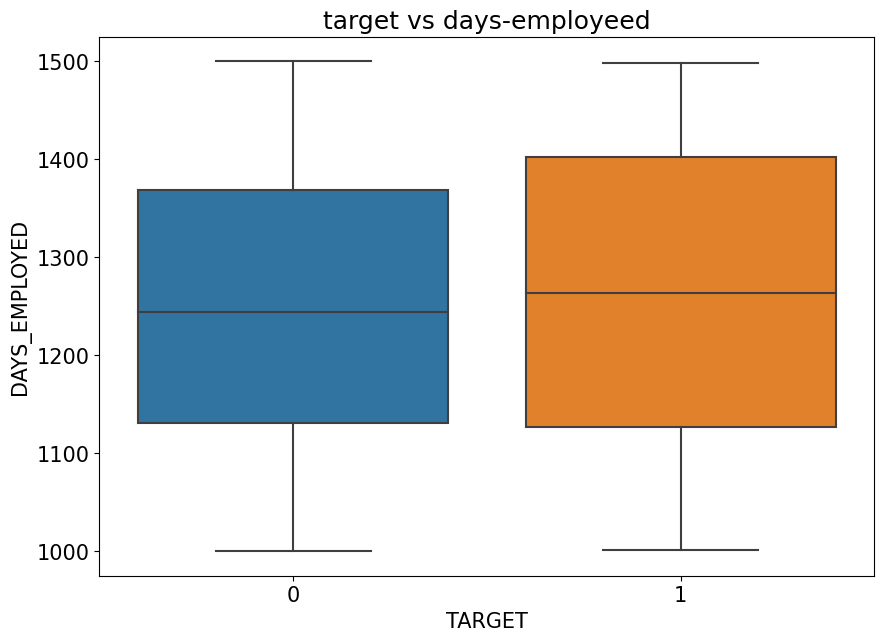

In [104]:
mat.rcParams['font.size'] = 15
fig,ax = plt.subplots(figsize=(10,7))
ax.set_title('target vs days-employeed')
sb.boxplot(y=df2['DAYS_EMPLOYED'], x =df2['TARGET'])
plt.show()

# INTERPRETATION:- Histogram is uniform distribution. Observing the box plot defaulters have more spread than non-defaulters.

In [94]:
df3=df[(df['NAME_CONTRACT_TYPE']=='Cash loans')&(df['AMT_INCOME_TOTAL']>=200000)&(df['AMT_INCOME_TOTAL']<=250000)&
       (df['NAME_EDUCATION_TYPE']=='Secondary / secondary special')]
df3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,697500.0,...,3028,1,1,0,1,0,Drivers,3.0,THURSDAY,1
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,927000.0,...,1652,1,1,0,1,0,Sales staff,3.0,MONDAY,1
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
41,100048,0,Cash loans,F,N,Y,0,202500.0,604152.0,540000.0,...,475,1,1,0,1,0,Laborers,2.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,216033,0,Cash loans,F,Y,N,0,225000.0,1035832.5,904500.0,...,1192,1,1,0,1,1,Managers,2.0,WEDNESDAY,1
99953,216042,0,Cash loans,F,N,N,0,202500.0,900000.0,900000.0,...,3155,1,1,1,1,0,NaN,2.0,TUESDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,1669,1,1,0,1,0,NaN,2.0,SATURDAY,1
99984,216075,0,Cash loans,F,Y,Y,0,225000.0,513531.0,459000.0,...,5127,1,1,0,1,0,Sales staff,1.0,FRIDAY,1


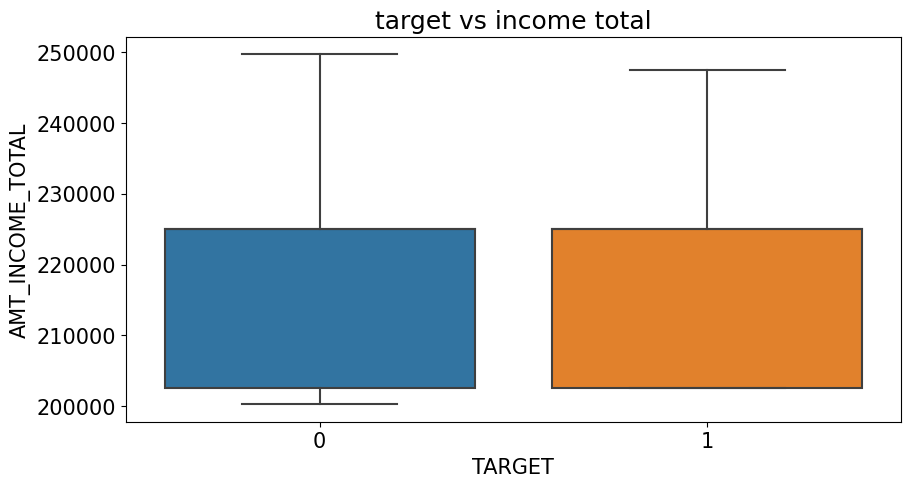

In [95]:
mat.rcParams['font.size'] = 15
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('target vs income total')
sb.boxplot(y=df3['AMT_INCOME_TOTAL'], x =df3['TARGET'])
plt.show()

# INTERPRETATION:-From the above box plot both defaulters and non-defaulters almost equal spread that means 50-50 chances of sanction the loan

In [50]:
df4=df[(df['NAME_CONTRACT_TYPE']=='Cash loans')&(df['AMT_INCOME_TOTAL']>=200000)&(df['AMT_INCOME_TOTAL']>=250000)&
       (df['NAME_EDUCATION_TYPE']=='Secondary / secondary special')&(df['OCCUPATION_TYPE']== 'Laborers')&
       (df['NAME_FAMILY_STATUS']== 'Married')&(df['DAYS_EMPLOYED']>= 1000)&(df['DAYS_EMPLOYED']<= 1500)&
       (df['NAME_INCOME_TYPE']== 'Working')&(df['AMT_CREDIT']>= 200000)&(df['AMT_CREDIT']<= 300000)]
df4

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
3543,104140,0,Cash loans,M,Y,Y,1,270000.0,284400.0,225000.0,...,1164,1,1,0,1,0,Laborers,3.0,SATURDAY,1
4032,104716,0,Cash loans,M,N,Y,1,315000.0,267102.0,247500.0,...,1052,1,1,0,1,0,Laborers,3.0,THURSDAY,1
23671,127544,0,Cash loans,M,N,Y,1,315000.0,257391.0,238500.0,...,1029,1,1,0,1,0,Laborers,3.0,SUNDAY,1
32154,137280,0,Cash loans,M,Y,Y,2,472500.0,219042.0,193500.0,...,1248,1,1,0,1,0,Laborers,4.0,FRIDAY,1
39550,145790,0,Cash loans,M,Y,Y,0,315000.0,254700.0,225000.0,...,1147,1,1,0,1,0,Laborers,2.0,SUNDAY,1
60255,169867,0,Cash loans,F,Y,Y,0,360000.0,269550.0,225000.0,...,1443,1,1,1,1,0,Laborers,2.0,THURSDAY,1
67198,177930,1,Cash loans,M,N,Y,0,360000.0,292500.0,292500.0,...,1085,1,1,0,1,0,Laborers,2.0,TUESDAY,1
71953,183441,0,Cash loans,M,N,Y,1,382500.0,247275.0,225000.0,...,1344,1,1,0,1,0,Laborers,3.0,WEDNESDAY,1
92384,207274,0,Cash loans,M,Y,Y,2,270000.0,251091.0,238500.0,...,1311,1,1,0,1,0,Laborers,4.0,TUESDAY,1


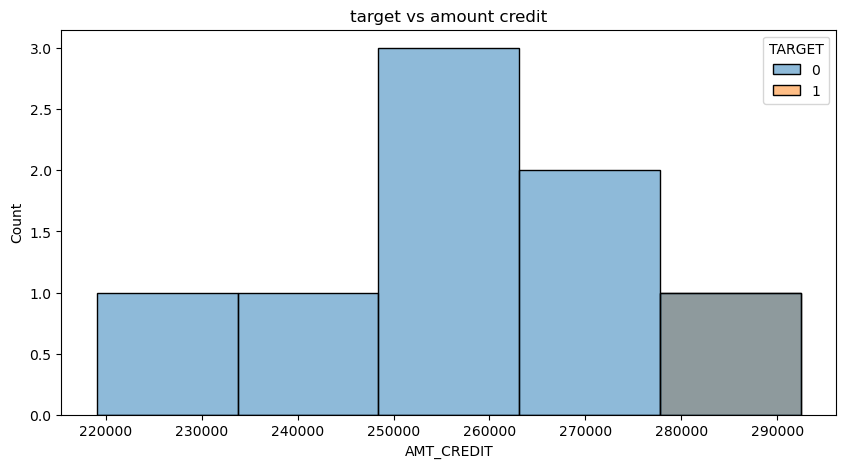

In [51]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('target vs amount credit')
sb.histplot(x=df4['AMT_CREDIT'], hue =df4['TARGET'])
plt.show()

# INTERPRETATION:- Histogram slightly Left Skewed. observing this the credit amount between 280000 and 29000 both defaulters and non- defaulters are equal. from that condition there is equal chance to get profit and loss of banks.

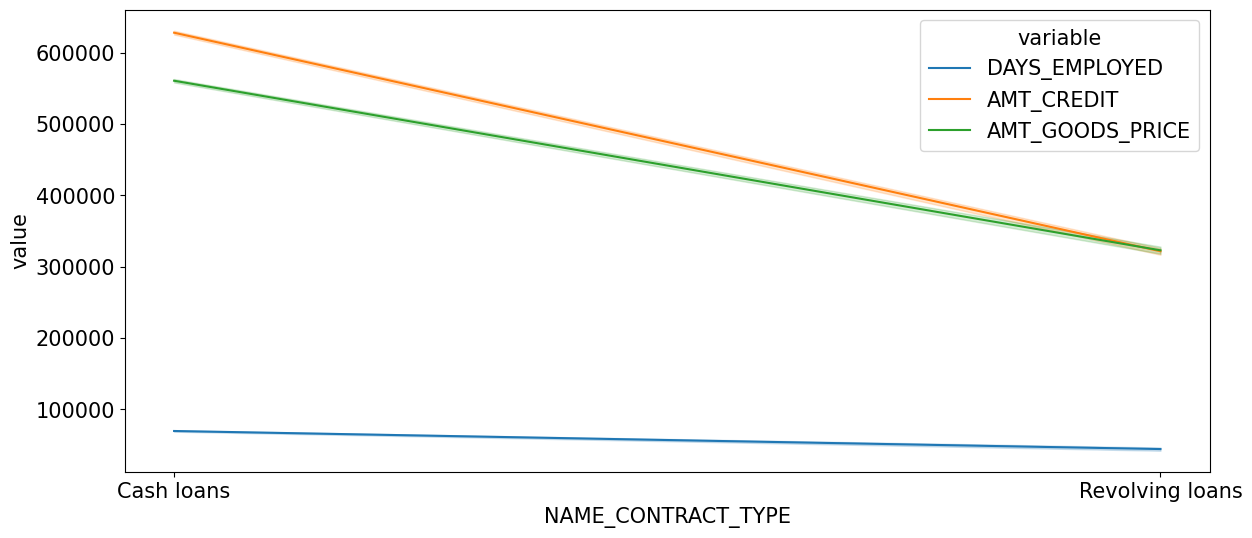

In [89]:
mat.rcParams['font.size'] = 15
fig,ax = plt.subplots(figsize=(14,6))
meltdf = pd.melt(df, id_vars = ['NAME_CONTRACT_TYPE'], value_vars = ['DAYS_EMPLOYED','AMT_CREDIT','AMT_GOODS_PRICE'],
                 var_name = 'variable',value_name = 'value')
sb.lineplot(x = 'NAME_CONTRACT_TYPE', hue = 'variable', y = 'value', data = meltdf  )
plt.show()

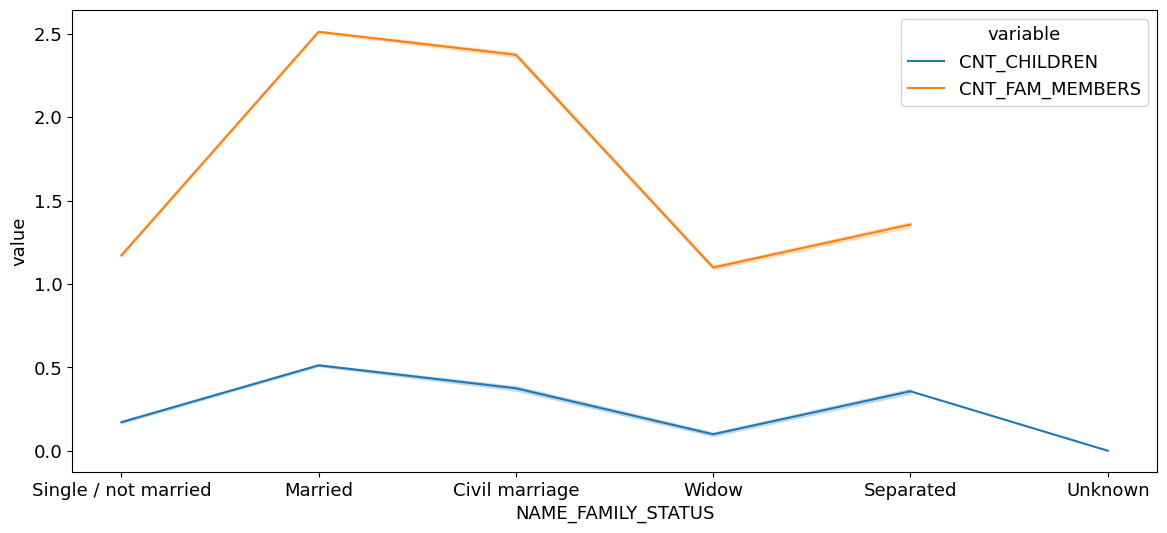

In [88]:
mat.rcParams['font.size'] = 13
fig,ax = plt.subplots(figsize=(14,6))
meltdf = pd.melt(df, id_vars = ['NAME_FAMILY_STATUS'], value_vars = ['CNT_CHILDREN','CNT_FAM_MEMBERS'],
                 var_name = 'variable',value_name = 'value')
sb.lineplot(x = 'NAME_FAMILY_STATUS', hue = 'variable', y = 'value', data = meltdf  )
plt.show()